# DRUG MARKETING AND PHYSICIAN TARGETING!

## 1. Business Problem

One of the top 5 pharmaceutical companies, Axtratia, headquartered in the US, had launched Axtenna, a drug for the treatment of stage 1 chronic kidney disease, 2.5 years ago. However, some physicians are yet to prescribe it for the first time. A key client stakeholder has reached out to a Decision Sciences Principal in Axtria for help to identify potential physicians who are most likely to start prescribing the drug in the next quarter in order to channelize the marketing efforts more effectively while targeting potential physicians.

<b>Task</b>

To create a model that identifies the prospective physicians who have high likelihood to start prescribing the drug in 11th quarter for the first time. You are expected to use the input data files to perform any exploratory data analysis, feature engineering, and to develop a model.

## 2. Evaluation Metrices

**EVALUATION  AND REQUIREMENT:**

**Model Performance :** F1 score for predicting adoption class for physicians in prediction data (Physiances_id.csv) [Weightage : 40%]

**Solution Code :** Structure and Re-usability of code.
Exhaustiveness of steps (data processing, algorithms)
[Weightage : 20%]

**Solution Write-up :** Correctness/ Robustness of solution approach,
Model Construct, and features used.
Model Validation approach, Model/algorithms tried and results
Innovation and additional insights [Weightage : 40%]

**Data Source:** https://www.kaggle.com/nishantrock/predict-physician-and-drug-axtria-hackathon

## 3. Data Description

<b> Column Description </b>
<img src="data/column_list.PNG" alt="Column list table"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action="ignore")
import os

In [2]:
base_dir=os.path.abspath(os.path.curdir)
print("Current directy path::", base_dir)

Current directy path:: E:\WorkStation\Predict Physician and Drug


In [3]:
column=pd.read_excel(os.path.join(base_dir,"Column_explanation_file.xlsx"),header=1)
column.drop(columns=["Unnamed: 0"],inplace=True)
column

,Variable Name,Variable Details,Data Type
0,physician_id,Unique ID of physician,Numeric
1,year_quarter,Current year and calendar quarter (e.g 201804 ...,YYYY0Q
2,brand_prescribed,Flag indicating whether the physician prescrib...,0/1
3,total_representative_visits,Total visits by sales representatives in the g...,Numeric
4,total_sample_dropped,Total Drug Samples dropped by sales representa...,Numeric
5,saving_cards_dropped,Total Savings Card given to the physicians to ...,Numeric
6,vouchers_dropped,Total Vouchers given to the physicians to be p...,Numeric
7,total_seminar_as_attendee,Speaker Programs Attended by the physician as ...,Numeric
8,total_seminar_as_speaker,Speaker Programs Attended by the physician as ...,Numeric
9,physician_hospital_affiliation,Binary variable to indicate if the physician i...,0/1


In [4]:
ph_activity=pd.read_csv(os.path.join(base_dir,"train_physician_activity.csv"))
ph_activity.drop(columns=["Unnamed: 0"],inplace=True)
ph_activity.tail()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
99995,10000,201903,1,5,0,0,0,1,0,0,...,0,2,2,1,1,1,1,108,17,Medium
99996,10000,201904,1,4,6,0,0,0,0,0,...,0,1,6,1,1,1,1,95,28,Medium
99997,10000,202001,1,9,8,0,0,0,0,0,...,0,2,2,0,0,1,1,87,14,Medium
99998,10000,202002,1,7,40,0,0,0,0,0,...,0,3,5,0,0,1,1,80,0,Medium
99999,10000,202003,1,6,12,0,0,0,0,0,...,0,3,6,0,0,1,1,96,39,High


In [5]:
ph_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   physician_id                                  100000 non-null  int64 
 1   year_quarter                                  100000 non-null  int64 
 2   brand_prescribed                              100000 non-null  int64 
 3   total_representative_visits                   100000 non-null  int64 
 4   total_sample_dropped                          100000 non-null  int64 
 5   saving_cards_dropped                          100000 non-null  int64 
 6   vouchers_dropped                              100000 non-null  int64 
 7   total_seminar_as_attendee                     100000 non-null  int64 
 8   total_seminar_as_speaker                      100000 non-null  int64 
 9   physician_hospital_affiliation                100000 non-nul

In [6]:
print("Shape of Above Data",ph_activity.shape)

Shape of Above Data (100000, 26)


In [7]:
ph_data=pd.read_csv(os.path.join(base_dir,"train_physician_data.csv"))
ph_data.drop(columns=["Unnamed: 0"],inplace=True)
ph_columns=ph_data.columns.values
ph_data.head()

,physician_id,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality
0,1,0.91,0.89,M,58,83,nephrology
1,2,0.21,0.89,M,41,71,other
2,3,1.00,0.58,M,38,71,nephrology
3,4,0.96,0.96,M,42,69,nephrology
4,5,1.00,0.20,M,38,69,nephrology


In [8]:
print("Shape of Above Data",ph_data.shape)

Shape of Above Data (10000, 7)


In [9]:
ph_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   physician_id                                         10000 non-null  int64  
 1   urban_population_perc_in_physician_locality          10000 non-null  float64
 2   percent_population_with_health_insurance_in_last10q  10000 non-null  float64
 3   physician_gender                                     10000 non-null  object 
 4   physician_tenure                                     10000 non-null  int64  
 5   physician_age                                        10000 non-null  int64  
 6   physician_speciality                                 10000 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 547.0+ KB


## 4. EDA (Exploratory Data Analysis)

### 4.0 Missing Value and Imputation

In [10]:
nan_cols = [i for i in ph_activity.columns if ph_activity[i].isnull().any()]
total_nan=ph_activity[nan_cols].isna().sum().sum()
print("{} has Total {} NaN value :: {} %".format(nan_cols,total_nan,total_nan/len(ph_activity)*100))

['physician_segment'] has Total 51098 NaN value :: 51.098 %


**Observation**
* given dataset has 50% of target varible is NaN so better separate them and if required then we can apply unsupervised learning (clustering).
* We have 50% of data for supervised learning.

In [11]:
ph_activity=ph_activity[ph_activity["physician_segment"].notna()]
ph_activity.head()

,physician_id,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,...,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,physician_segment
5,1,201903,1,9,39,0,0,1,0,0,...,28,2,0,1,1,1,1,165,42,High
6,1,201904,1,4,12,0,0,0,0,0,...,36,1,1,1,1,1,1,169,45,High
7,1,202001,1,14,26,0,0,1,0,0,...,33,4,1,0,0,1,1,198,49,High
8,1,202002,1,18,20,0,0,1,0,0,...,28,7,1,0,0,1,1,170,46,High
9,1,202003,1,5,96,0,0,0,0,0,...,31,7,1,0,0,0,1,169,0,Medium


In [12]:
# Shape after removing NULL target rows
print("Shape of ph_activity data:: ",ph_activity.shape)

Shape of ph_activity data::  (48902, 26)


In [13]:
#Merging ph_activity and ph_data based on physician_id
data=ph_activity.merge(ph_data,how="inner",on="physician_id")


In [14]:
data=data[data.physician_gender != "Unknown"]
print("Shape of ph_activity data:: ",data.shape)

Shape of ph_activity data::  (48894, 32)


In [15]:
def extract_quarter(quarter):
    if quarter=='01':
        return "Q1"
    elif quarter=="02":
        return "Q2"
    elif quarter=="03":
        return "Q3"
    elif quarter=="04":
        return "Q4"
    else:
        return "UNK"

In [16]:
data["quarter"]=[extract_quarter(str(val)[-2:]) for val in data.year_quarter]
data["year"]=[int(str(val)[:4]) for val in data.year_quarter]
data["year_quarter"]=[str(val)[:4]+"-"+extract_quarter(str(val)[-2:]) for val in data.year_quarter]

In [17]:
data["year_quarter"].value_counts()

2020-Q3    9934
2020-Q2    9721
2020-Q1    9703
2019-Q4    9681
2019-Q3    9664
2019-Q2     191
Name: year_quarter, dtype: int64

In [19]:
#Saving data after combining for future use
data["physician_segment_ordinal"]=data["physician_segment"].map({'High':2, 'Medium':1, 'Low':0, 'Very High':3})
if not os.path.isfile(os.path.join(base_dir,"all_data.csv")):
    data.to_csv(os.path.join(base_dir,"all_data.csv"),index_label=False)
else: 
    data=pd.read_csv(os.path.join(base_dir,"all_data.csv"))
    

In [19]:
data.drop(columns=["physician_id"],inplace=True)
data.head()

,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,quarter,year,physician_segment_ordinal
0,2019-Q3,1,9,39,0,0,1,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q3,2019,3
1,2019-Q4,1,4,12,0,0,0,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q4,2019,3
2,2020-Q1,1,14,26,0,0,1,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q1,2020,3
3,2020-Q2,1,18,20,0,0,1,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q2,2020,3
4,2020-Q3,1,5,96,0,0,0,0,0,1,...,Medium,0.91,0.89,M,58,83,nephrology,Q3,2020,2


In [20]:
# Categorical and Numerical column list
categorical_columns=["physician_gender","physician_in_group_practice","physician_hospital_affiliation"
                          ,"physician_speciality","brand_prescribed","year_quarter","quarter","year"]
numerical_columns=[col for col in data.columns.values if col not in categorical_columns]

In [31]:
numerical_columns.remove("physician_segment")

### 4.1 Target Distribution:

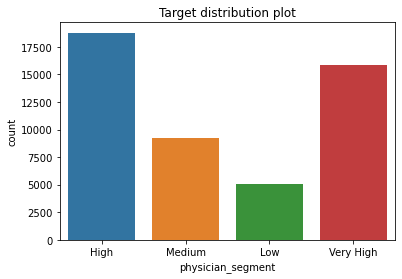

In [32]:
sns.countplot(ph_activity["physician_segment"])
plt.title("Target distribution plot")
plt.show()

In [33]:
data["physician_segment"].value_counts(normalize=True)

High         0.383789
Very High    0.324191
Medium       0.188387
Low          0.103632
Name: physician_segment, dtype: float64

**Observation**
* The categories ‘High’ and ‘Very High’ constitute major part of the records (approx 71%) and Low and Medium segments constitute (29%)

### 4.2 Categorical Variable

#### 4.2.1 Unitvariate Analysis

In [34]:
# Preparing data to plot the pie chart
physician_gender=data["physician_gender"].value_counts()
physician_speciality=data["physician_speciality"].value_counts()
brand_prescribed=data["brand_prescribed"].value_counts()
physician_hospital_affiliation=data["physician_hospital_affiliation"].value_counts()
physician_in_group_practice=data["physician_in_group_practice"].value_counts()

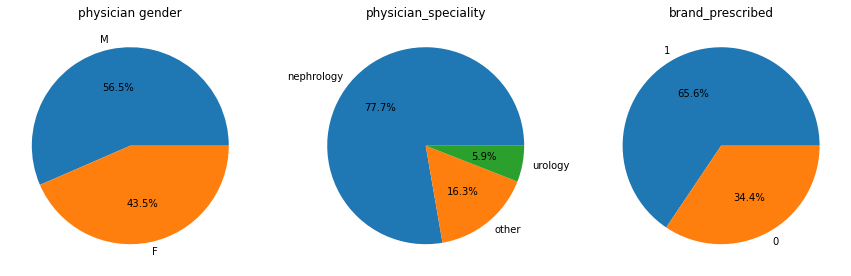

In [35]:

fig,ax=plt.subplots(1,3,figsize=(5,15))
fig.set_figheight(5)
fig.set_figwidth(15)
color=["green", "orange","yellow"]
# fig.set_title("Categorical valriable Pie Chart")
ax[0].pie(x=physician_gender, autopct="%.1f%%",labels=physician_gender.keys())
ax[0].set_title("physician gender")

ax[1].pie(x=physician_speciality, autopct="%.1f%%",labels=physician_speciality.keys())
ax[1].set_title("physician_speciality")

ax[2].pie(x=brand_prescribed, autopct="%.1f%%",labels=brand_prescribed.keys())
ax[2].set_title("brand_prescribed")
plt.show()

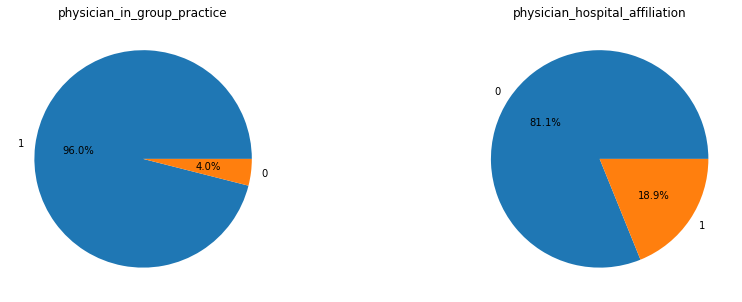

In [36]:

fig,ax=plt.subplots(1,2,figsize=(5,15))
fig.set_figheight(5)
fig.set_figwidth(15)
color=["green", "orange","yellow"]
# fig.set_title("Categorical valriable Pie Chart")
ax[0].pie(x=physician_in_group_practice, autopct="%.1f%%",labels=physician_in_group_practice.keys())
ax[0].set_title("physician_in_group_practice")

ax[1].pie(x=physician_hospital_affiliation, autopct="%.1f%%",labels=physician_hospital_affiliation.keys())
ax[1].set_title("physician_hospital_affiliation")


plt.show()

**Objective**
So below are the inferences which is derived from the pie chart
* Physician Gender has almost same distribution.
* Physician_speciality has nephrology with 78%, urology 6% and other 16%.
* Brand_prescribed  has 65% and 35% of distribution.
* Very few physician are working indivisually and around 96 % of physicians are working in group.
* Around 81% of physician hospital are not affliated, where 19% are affliated.

#### 4.2.2 Bivariate Analysis

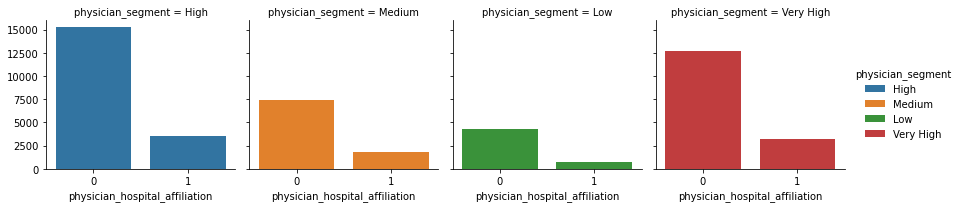

In [37]:

sns.FacetGrid(data,col="physician_segment",hue="physician_segment")\
.map(sns.countplot,"physician_hospital_affiliation").add_legend()
plt.show()

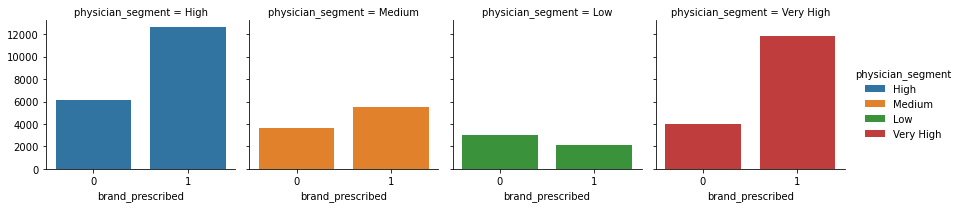

In [38]:
sns.FacetGrid(data,col="physician_segment",hue="physician_segment")\
.map(sns.countplot,"brand_prescribed").add_legend()
plt.show()

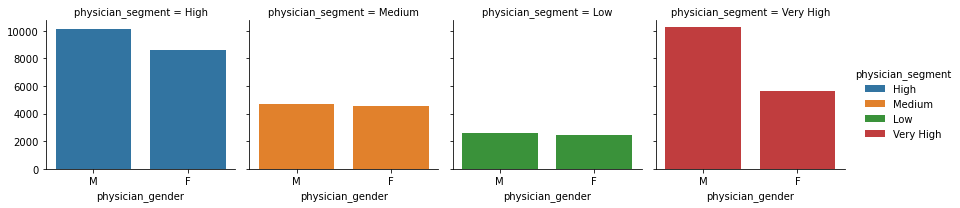

In [39]:
sns.FacetGrid(data,col="physician_segment",hue="physician_segment")\
.map(sns.countplot,"physician_gender").add_legend()
plt.show()

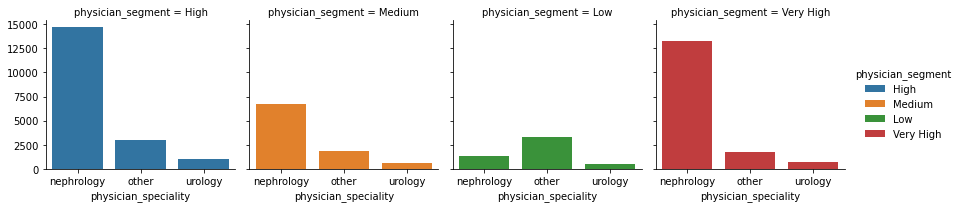

In [40]:
sns.FacetGrid(data,col="physician_segment",hue="physician_segment")\
.map(sns.countplot,"physician_speciality").add_legend()
plt.show()

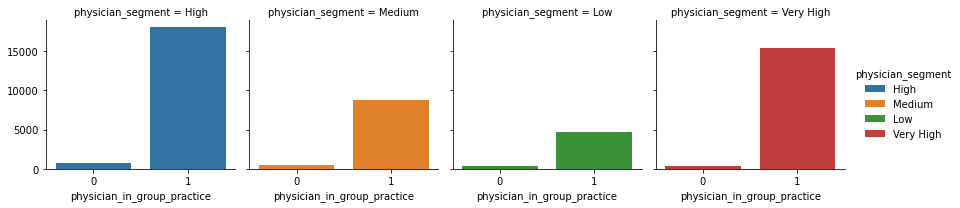

In [41]:
sns.FacetGrid(data,col="physician_segment",hue="physician_segment")\
.map(sns.countplot,"physician_in_group_practice").add_legend()
plt.show()

In [42]:
print("Distribution of year_quarter:::")
data["year_quarter"].value_counts(normalize=True)*100

Distribution of year_quarter:::


2020-Q3    20.317421
2020-Q2    19.881785
2020-Q1    19.844971
2019-Q4    19.799975
2019-Q3    19.765206
2019-Q2     0.390641
Name: year_quarter, dtype: float64

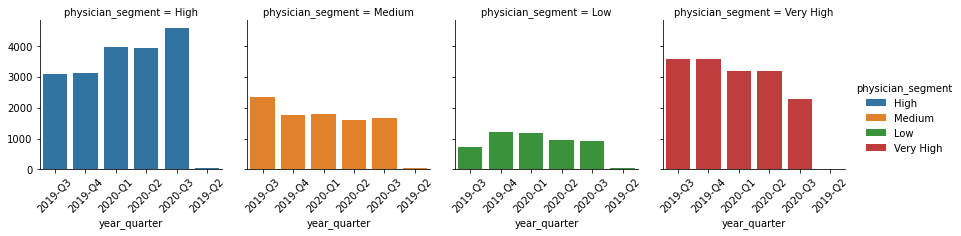

In [43]:
g=sns.FacetGrid(data,col="physician_segment",hue="physician_segment")\
.map(sns.countplot,"year_quarter").add_legend()
g.set_xticklabels(rotation=45)
plt.show()

<b style="color:red"> Q&A </b>

<b>Ques.</b> <i>Does gender impact on the physician segment?</i>

<b>Ans.</b> Yes, as you can see Very High and High Category percentage is more for Male population, than Female. For Female population we see that Medium and Low constitute more percentage

<b>Ques.</b> <i>Does physician speciality impact on the physician segment?</i>

<b>Ans.</b> Yes, the physician with speciality in nephrology tend to prescribe more than the urology and others category

<b>Ques.</b> <i>Does Brand_prescribe impact on the physician segment?</i>

<b>Ans.</b> Yes, the low segment physician are likely to less prescribe the brand in given quater.

<b>Ques.</b> <i>Does physician in group practice impact on the physician segment?</i>

<b>Ans.</b> Yes, the physician, who practice in group tend to prescibe more than who practice indivisually. Even distribution of physician_practice_in_group are not same so most of physicians are likely to work in group.

<b>Ques.</b> <i>Does year_quarter impact on the physician segment?</i>

<b>Ans.</b> Not Much,Because every quater has around 20% of data points.

### 4.3 Numerical Variable EDA

#### 4.3.1 Univariate Analysis with Boxplot

Boxplot will tell the spread of numerical variable and help to see the outliers

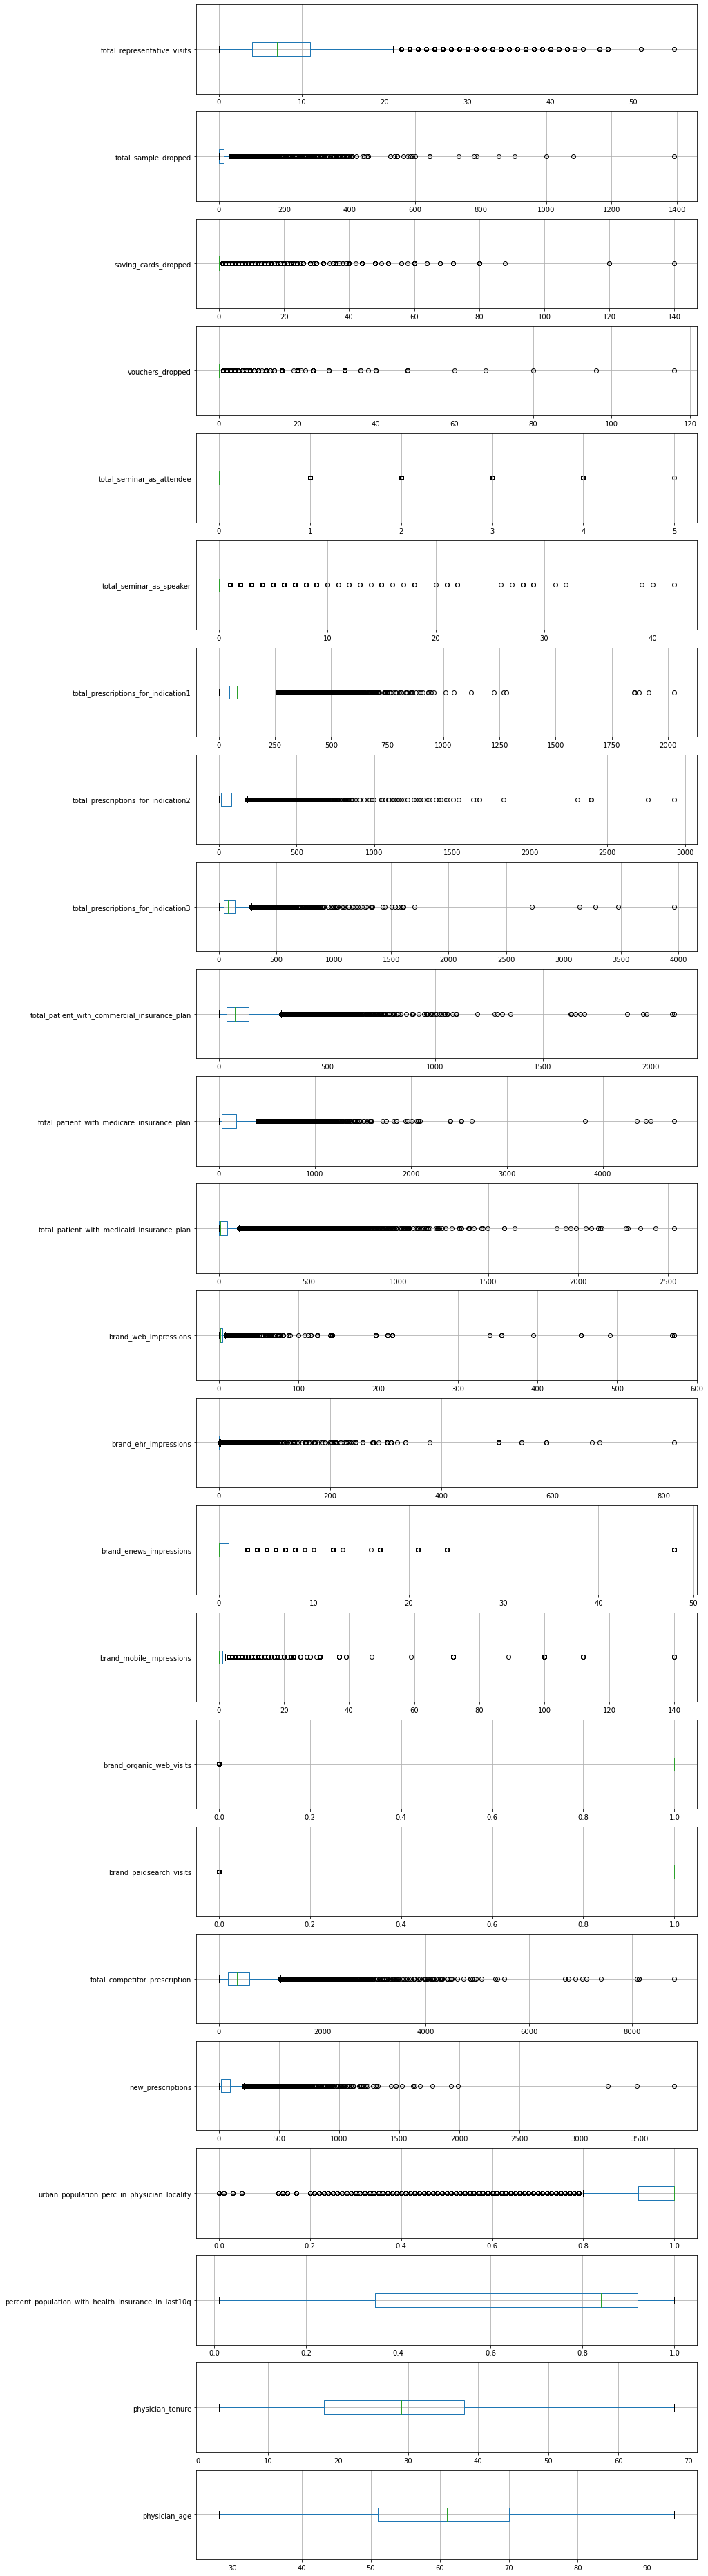

In [44]:
fig, axes = plt.subplots(24, 1, figsize=(13, 68))
for i, j in enumerate(numerical_columns):
    data[[j]].boxplot(ax=axes[i], vert=False)

#### 4.3.2 Bivariate Analysis

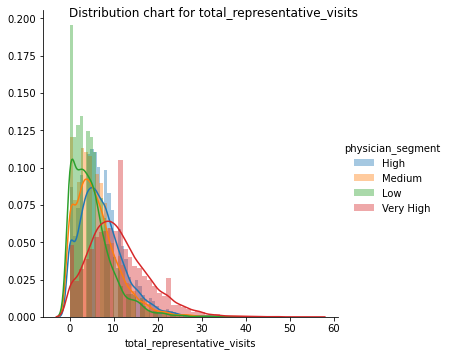

In [61]:
g = sns.FacetGrid(data[['total_representative_visits','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_representative_visits") \
.add_legend();
g.fig.suptitle('Distribution chart for total_representative_visits ')

plt.show();

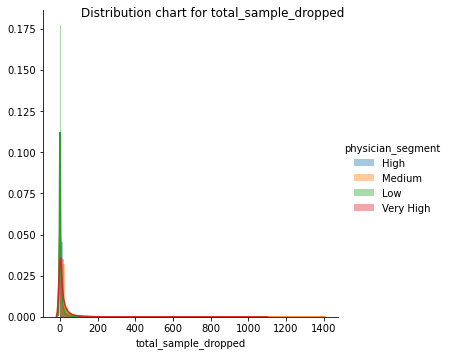

In [62]:
g = sns.FacetGrid(data[['total_sample_dropped','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "total_sample_dropped") \
.add_legend();
g.fig.suptitle('Distribution chart for total_sample_dropped ')

plt.show();

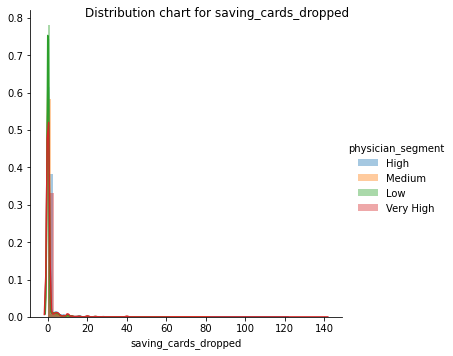

In [63]:
g = sns.FacetGrid(data[['saving_cards_dropped','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "saving_cards_dropped") \
.add_legend();
g.fig.suptitle('Distribution chart for saving_cards_dropped ')

plt.show();

**Observation**
* There are many numerical features which are right skewed.
* For getting rid of right skewed at the EDA, lets apply log for those variable

In [64]:
data.columns

Index(['year_quarter', 'brand_prescribed', 'total_representative_visits',
       'total_sample_dropped', 'saving_cards_dropped', 'vouchers_dropped',
       'total_seminar_as_attendee', 'total_seminar_as_speaker',
       'physician_hospital_affiliation', 'physician_in_group_practice',
       'total_prescriptions_for_indication1',
       'total_prescriptions_for_indication2',
       'total_prescriptions_for_indication3',
       'total_patient_with_commercial_insurance_plan',
       'total_patient_with_medicare_insurance_plan',
       'total_patient_with_medicaid_insurance_plan', 'brand_web_impressions',
       'brand_ehr_impressions', 'brand_enews_impressions',
       'brand_mobile_impressions', 'brand_organic_web_visits',
       'brand_paidsearch_visits', 'total_competitor_prescription',
       'new_prescriptions', 'physician_segment',
       'urban_population_perc_in_physician_locality',
       'percent_population_with_health_insurance_in_last10q',
       'physician_gender', 'physician

In [65]:
skewed_data=pd.DataFrame()

In [66]:
skewed_data["physician_segment"]=data["physician_segment"]
skewed_data["total_sample_dropped"]=np.log1p(data["total_sample_dropped"])
skewed_data["saving_cards_dropped"]=np.log1p(data["saving_cards_dropped"])
skewed_data["total_representative_visits"]=np.log1p(data["total_representative_visits"])
skewed_data["vouchers_dropped"]=np.log1p(data["vouchers_dropped"])
skewed_data["total_seminar_as_attendee"]=np.log1p(data["total_seminar_as_attendee"])
skewed_data["total_seminar_as_speaker"]=np.log1p(data["total_seminar_as_speaker"])

In [67]:
skewed_data.head()

,physician_segment,total_sample_dropped,saving_cards_dropped,total_representative_visits,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker
0,High,3.688879,0.0,2.302585,0.0,0.693147,0.0
1,High,2.564949,0.0,1.609438,0.0,0.000000,0.0
2,High,3.295837,0.0,2.708050,0.0,0.693147,0.0
3,High,3.044522,0.0,2.944439,0.0,0.693147,0.0
4,Medium,4.574711,0.0,1.791759,0.0,0.000000,0.0


In [68]:
log_cols=list(skewed_data.columns)
log_cols.remove("physician_segment")

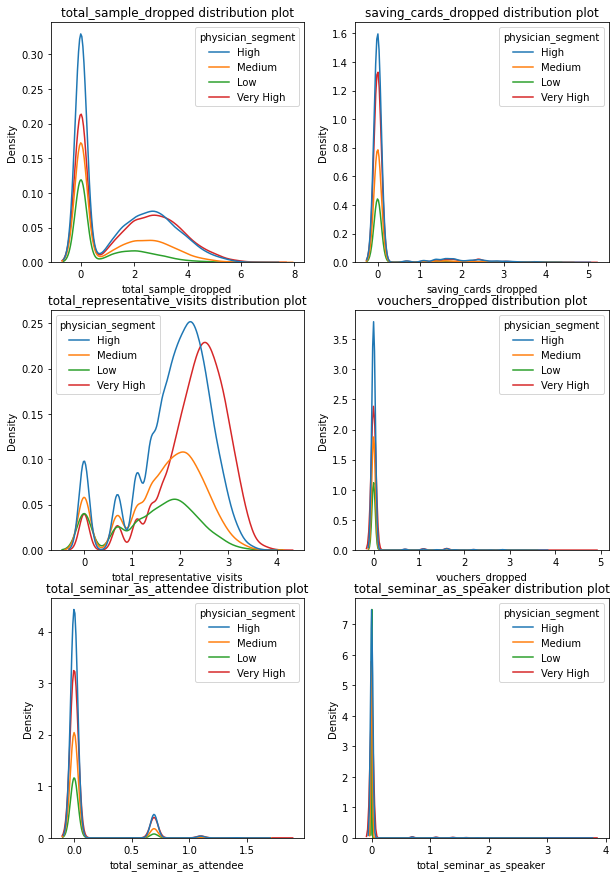

In [69]:
plt.figure(figsize=(10,15))
for i,col in enumerate(log_cols):
    plt.subplot(3,2,i+1)
    g=sns.kdeplot(data=skewed_data,x=col,hue="physician_segment")
    g.set_title(col+" distribution plot")

**Observation**
* after apply log, plots look better for all skewed feature

## 4.4 Statistical analysis

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr,spearmanr

### 4.4.1 Multicollinearity check and remove 

In [72]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# log_cols.append("physician_segment")
X=data[log_cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature       VIF
0         total_sample_dropped  1.275844
1         saving_cards_dropped  1.081820
2  total_representative_visits  1.373708
3             vouchers_dropped  1.031343
4    total_seminar_as_attendee  1.142025
5     total_seminar_as_speaker  1.008237


**Observation**
* We see that VIF Score is < 10, which is good and it represents no multi-colinearity problem between variables

### 4.4.2 pearson correlation coeff


Now, we will calculate the **pearson correlation coeff** values between variable and target variable, which will help us in figuring out how much a variable can impact the **TARGET LABEL**

In [73]:
# ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
for i,col in enumerate(log_cols):
    coef_val, p_val = pearsonr(data[col].values,data["physician_segment_ordinal"])
    print('{}. pearsons correlation coefficient between {} :: {}'.format(i+1,col,round(coef_val,3)))
    # interpret the significance
    alpha_val = 0.05
    if p_val > alpha_val:
        print('   Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
    else:
        print('   Samples are correlated (reject H0) p=%.3f' % p_val)


1. pearsons correlation coefficient between total_sample_dropped :: 0.127
   Samples are correlated (reject H0) p=0.000
2. pearsons correlation coefficient between saving_cards_dropped :: 0.029
   Samples are correlated (reject H0) p=0.000
3. pearsons correlation coefficient between total_representative_visits :: 0.334
   Samples are correlated (reject H0) p=0.000
4. pearsons correlation coefficient between vouchers_dropped :: 0.039
   Samples are correlated (reject H0) p=0.000
5. pearsons correlation coefficient between total_seminar_as_attendee :: 0.053
   Samples are correlated (reject H0) p=0.000
6. pearsons correlation coefficient between total_seminar_as_speaker :: 0.041
   Samples are correlated (reject H0) p=0.000


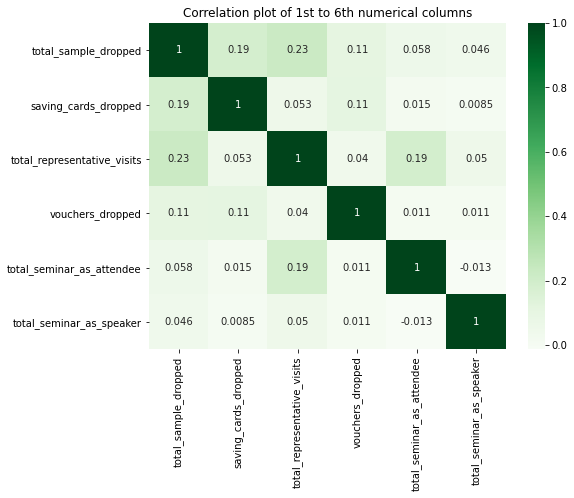

In [74]:
plt.figure(figsize=(8,6))
plt.title("Correlation plot of 1st to 6th numerical columns")
corr = data[log_cols].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Greens)
plt.show() 

**Observation**
* total_representative_visits has good correlation with target varible.
* We will explore more to this variable (total_representative_visits ) 

### 4.4.3 spearman Coefficient correlation

In [75]:
# ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
for i,col in enumerate(log_cols):
    coef_val, p_val = spearmanr(data[col].values,data["physician_segment_ordinal"])
    print('{}. spearmanr correlation coefficient between {}  :: {}'.format(i+1,col,round(coef_val,3)))
   

1. spearmanr correlation coefficient between total_sample_dropped  :: 0.176
2. spearmanr correlation coefficient between saving_cards_dropped  :: 0.021
3. spearmanr correlation coefficient between total_representative_visits  :: 0.355
4. spearmanr correlation coefficient between vouchers_dropped  :: 0.05
5. spearmanr correlation coefficient between total_seminar_as_attendee  :: 0.053
6. spearmanr correlation coefficient between total_seminar_as_speaker  :: 0.074


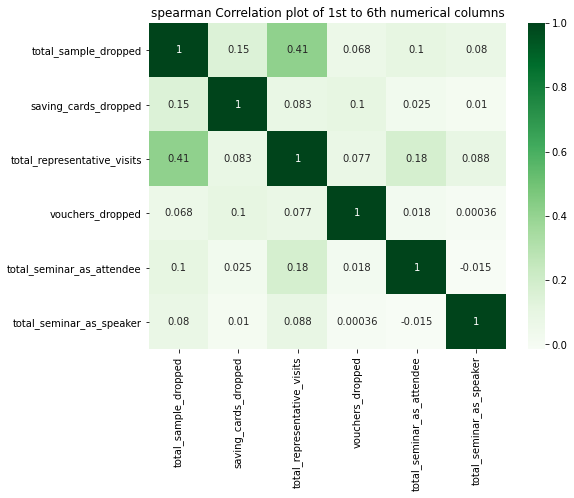

In [76]:
plt.figure(figsize=(8,6))
plt.title("spearman Correlation plot of 1st to 6th numerical columns")
corr = data[log_cols].corr(method="spearman")
sns.heatmap(corr, annot=True, cmap=plt.cm.Greens)
plt.show() 

### 4.4.4 check data distribution by Percentile of total_representative_visits  

In [77]:
for i in range(10):
    print("{}th percentile of total_representative_visits  ::: {}".format(91+i,np.percentile(data.total_representative_visits.values,91+i)))

91th percentile of total_representative_visits  ::: 17.0
92th percentile of total_representative_visits  ::: 17.0
93th percentile of total_representative_visits  ::: 18.0
94th percentile of total_representative_visits  ::: 19.0
95th percentile of total_representative_visits  ::: 20.0
96th percentile of total_representative_visits  ::: 21.0
97th percentile of total_representative_visits  ::: 22.0
98th percentile of total_representative_visits  ::: 24.0
99th percentile of total_representative_visits  ::: 27.0
100th percentile of total_representative_visits  ::: 55.0


In [78]:
for i in range(10):
    print("{}th percentile of total_representative_visits  ::: {}".format(round(99.1+i/10,2),np.percentile(data.total_representative_visits.values,99.1+i/10)))

99.1th percentile of total_representative_visits  ::: 28.0
99.2th percentile of total_representative_visits  ::: 28.0
99.3th percentile of total_representative_visits  ::: 29.0
99.4th percentile of total_representative_visits  ::: 29.0
99.5th percentile of total_representative_visits  ::: 30.0
99.6th percentile of total_representative_visits  ::: 31.0
99.7th percentile of total_representative_visits  ::: 32.0
99.8th percentile of total_representative_visits  ::: 34.0
99.9th percentile of total_representative_visits  ::: 38.0
100.0th percentile of total_representative_visits  ::: 55.0


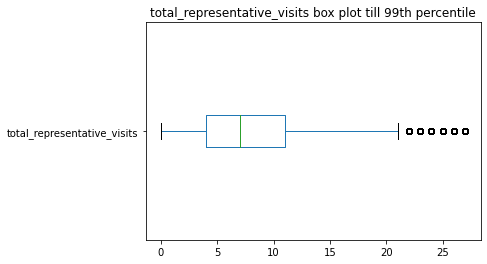

In [79]:
plt.title("total_representative_visits box plot till 99th percentile")
data[data["total_representative_visits"]<28]["total_representative_visits"].plot(vert=False,kind="box")
plt.show()

**Observation**
* 99.9 % of representative visits to physician is less than 38 times.
* only 0.1% of representative visits to physician is 55 times.
* after value 20 , It is showing outliers


In [80]:
for i in range(10):
    print("{}th percentile of total_sample_dropped  ::: {}".format(91+i,np.percentile(data.total_sample_dropped.values,91+i)))

91th percentile of total_sample_dropped  ::: 40.0
92th percentile of total_sample_dropped  ::: 45.56000000000495
93th percentile of total_sample_dropped  ::: 48.0
94th percentile of total_sample_dropped  ::: 56.0
95th percentile of total_sample_dropped  ::: 64.0
96th percentile of total_sample_dropped  ::: 73.0
97th percentile of total_sample_dropped  ::: 90.0
98th percentile of total_sample_dropped  ::: 112.0
99th percentile of total_sample_dropped  ::: 160.0
100th percentile of total_sample_dropped  ::: 1392.0


In [81]:
for i in range(10):
    print("{}th percentile of total_sample_dropped  ::: {}".format(round(99.1+i/10,2),np.percentile(data.total_sample_dropped.values,99.1+i/10)))

99.1th percentile of total_sample_dropped  ::: 168.0
99.2th percentile of total_sample_dropped  ::: 175.8559999999925
99.3th percentile of total_sample_dropped  ::: 184.0
99.4th percentile of total_sample_dropped  ::: 196.0
99.5th percentile of total_sample_dropped  ::: 214.13999999998487
99.6th percentile of total_sample_dropped  ::: 236.0
99.7th percentile of total_sample_dropped  ::: 260.0
99.8th percentile of total_sample_dropped  ::: 296.0
99.9th percentile of total_sample_dropped  ::: 368.42799999998533
100.0th percentile of total_sample_dropped  ::: 1392.0


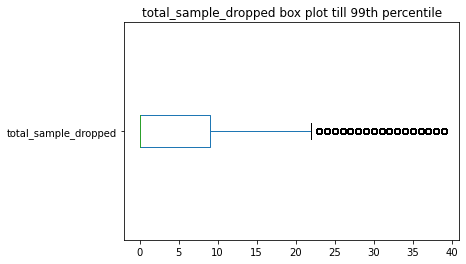

In [82]:
plt.title("total_sample_dropped box plot till 99th percentile")
data[data["total_sample_dropped"]<40]["total_sample_dropped"].plot(vert=False,kind="box")
plt.show()

**Observation**
* 99.9 % of sample dropped to physician are less than 368.
* only 0.1% of sample dropped  to physician is 1392.

In [83]:
data.head()

,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,...,physician_segment,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,quarter,year,physician_segment_ordinal
0,2019-Q3,1,9,39,0,0,1,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q3,2019,3
1,2019-Q4,1,4,12,0,0,0,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q4,2019,3
2,2020-Q1,1,14,26,0,0,1,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q1,2020,3
3,2020-Q2,1,18,20,0,0,1,0,0,1,...,High,0.91,0.89,M,58,83,nephrology,Q2,2020,3
4,2020-Q3,1,5,96,0,0,0,0,0,1,...,Medium,0.91,0.89,M,58,83,nephrology,Q3,2020,2


In [84]:
# Reference : https://stackoverflow.com/questions/59204445/how-to-do-i-groupby-count-and-then-plot-a-bar-chart-in-pandas
grp_by_brand_prescribed = data.groupby(['brand_prescribed','year_quarter' ,'physician_segment']).size().unstack()

In [85]:
grp_by_brand_prescribed

physician_segment              High  Low  Medium  Very High
brand_prescribed year_quarter                              
0                2019-Q2         37   40      21         10
                 2019-Q3       1334  727     724       1172
                 2019-Q4       1190  667     690       1063
                 2020-Q1       1302  602     640        808
                 2020-Q2       1125  540     601        704
                 2020-Q3       1181  403     996        248
1                2019-Q2         26   22      25         10
                 2019-Q3       1761  487    1045       2414
                 2019-Q4       1931  527    1092       2521
                 2020-Q1       2660  354     947       2390
                 2020-Q2       2807  381    1078       2485
                 2020-Q3       3411  317    1352       2026

<AxesSubplot:xlabel='brand_prescribed,year_quarter'>

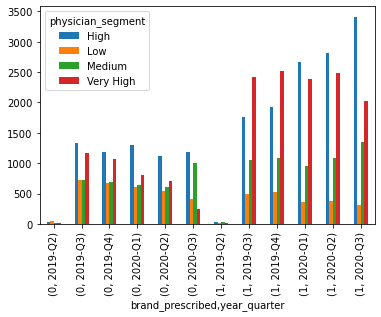

In [86]:
grp_by_brand_prescribed.plot(kind = 'bar')

<b style="color:red">So Let's Try to answer few more Hypothesis Questions</b>

**Q. Does brand_prescribed impact on the physician segment?**

A. Yes, if brand is prescribed the previous quarters, it is more likely that physician will prescribe it in next quarter.


**Q. Does total_representative_visits impact on the physician segment?**

- Yes, from the distribution chart we see that if the no of representative visits are high, then there is maximum chance that the physician will prescribe the medicine.

- In addition to it, have even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the 2 categories 'Very High' and 'High' 

- Good correlation also with the target label

**Q. Does total_sample_dropped impact on the physician segment?**

- Yes, it certainly impacts as we are seeing maximum distribution for the 2 segments (Very High and High Categories)

- Same could be inferred here as well if the no of samples dropped are more then there is more chance that the doctor will prescribe

**Q. Does saving_cards_dropped impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For saving_cards_dropped more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

**Q. Does vouchers_dropped impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For vouchers_dropped more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

**Q. Does total_seminar_as_attendee impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For total_semiar_as_attendee  more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

**Q. Does total_seminar_as_speaker impact on the physician segment?**

- It really does not make much of a difference as the distribution is peaked at 0 only

- For total_seminar_as_speaker more than 95% of data is 0 and we cannot make much inference from it

- Not much of correlation also with the target label

#### Let's see another features
#### EDA of next  features :: 
* ['physician_hospital_affiliation','physician_in_group_practice','total_prescriptions_for_indication1','total_prescriptions_for_indication2','total_prescriptions_for_indication3']

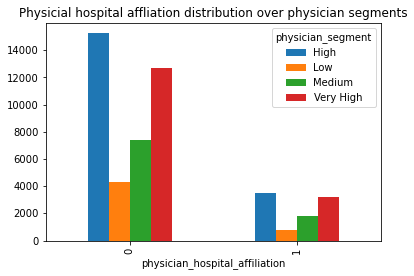

In [87]:
aff_grp_by_segment=data[["physician_hospital_affiliation","physician_segment"]].groupby(["physician_hospital_affiliation","physician_segment"]).size().unstack()
aff_grp_by_segment.plot(kind="bar")
plt.title("Physicial hospital affliation distribution over physician segments")
plt.show()

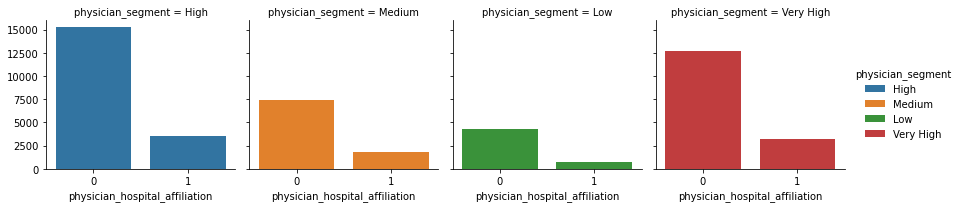

In [88]:
sns.FacetGrid(data=data,col="physician_segment",hue="physician_segment").\
map(sns.countplot,"physician_hospital_affiliation").add_legend()

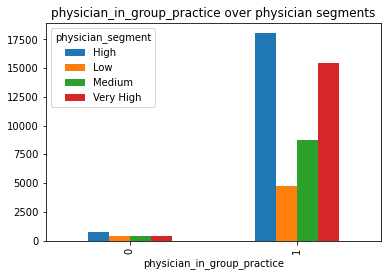

In [89]:
practice_grp_by_segment=data[["physician_in_group_practice","physician_segment"]].groupby(["physician_in_group_practice","physician_segment"]).size().unstack()
practice_grp_by_segment.plot(kind="bar")
plt.title("physician_in_group_practice over physician segments")
plt.show()

<b style="color:red">So Let's Try to answer few more Hypothesis Questions</b>

**Q. Does physician_hospital_affiliation impact on the physician segment?**

A. Yes, it looks like lot of physicians do not have hospital affiliations and are more likely to prescribe the medicines.

**Q. Does physician_in_group_practice impact on the physician segment?**

A. Yes, from the distribution chart we see that if the physician is in group setup then he is more likely to prescribe the medicine.

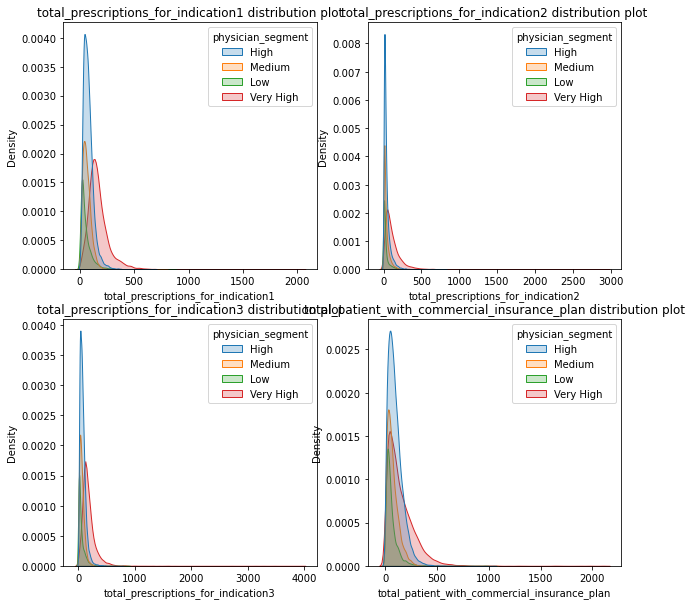

In [100]:
cols=['total_prescriptions_for_indication1','total_prescriptions_for_indication2','total_prescriptions_for_indication3',"total_patient_with_commercial_insurance_plan"]
plt.figure(figsize=(10,10))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1,)
    g=sns.kdeplot(data=data,x=col,hue="physician_segment",shade=True)
    g.set_title(col+" distribution plot")

# Lets again perform all the steps as we did before
- VIF (Multicollienearity check)
- pearson corr coef calculation, 
- correlation matrix, 
- Percentile check, 
- and Boxplots against 90th percentile dataset

#### variance inflation factor 

In [92]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# log_cols.append("physician_segment")
X=data[cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                        feature       VIF
0           total_prescriptions_for_indication1  6.627429
1           total_prescriptions_for_indication2  3.324927
2           total_prescriptions_for_indication3  7.114177
3  total_patient_with_commercial_insurance_plan  3.264110


**Observation**
* It looks like 'total_prescriptions_for_indication1' and 'total_prescriptions_for_indication3' do have colinearity issue as the value seems to be high

#### pearson corr coef calculation

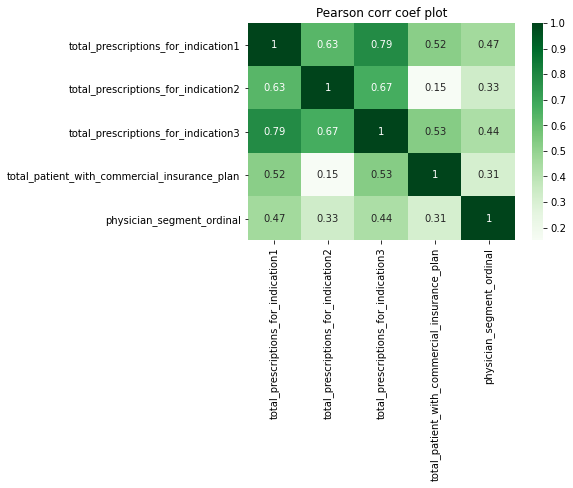

In [101]:
cols.append("physician_segment_ordinal")
cor=data[cols].corr()
plt.title("Pearson corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

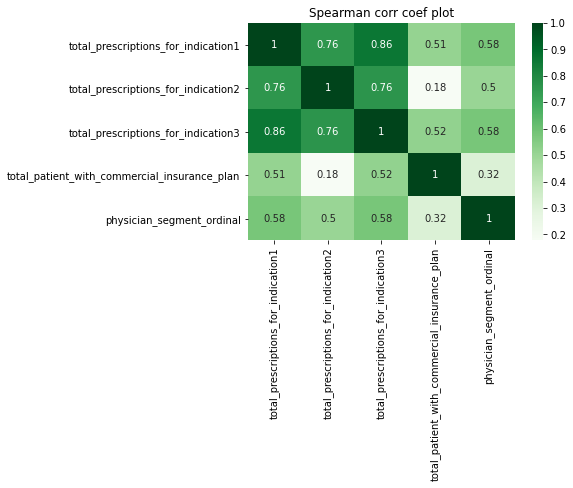

In [102]:
cor=data[cols].corr(method="spearman")
plt.title("Spearman corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

**Observation**
- We can infer from pearson correlation coef values and the correlation matrix that all 3 columns have a greater impact on target label.

- In addition to it, we also see that total_prescriptions_for_indication1 is higly colinear to total_prescriptions_for_indication3. So during our modeling we will remove total_prescriptions_for_indication3

- above feature are right skewed so lets apply log on data then we will see how useful are them

In [103]:
cols.remove("physician_segment_ordinal")
for col in cols:
    skewed_data[col]=np.log1p(data[col])

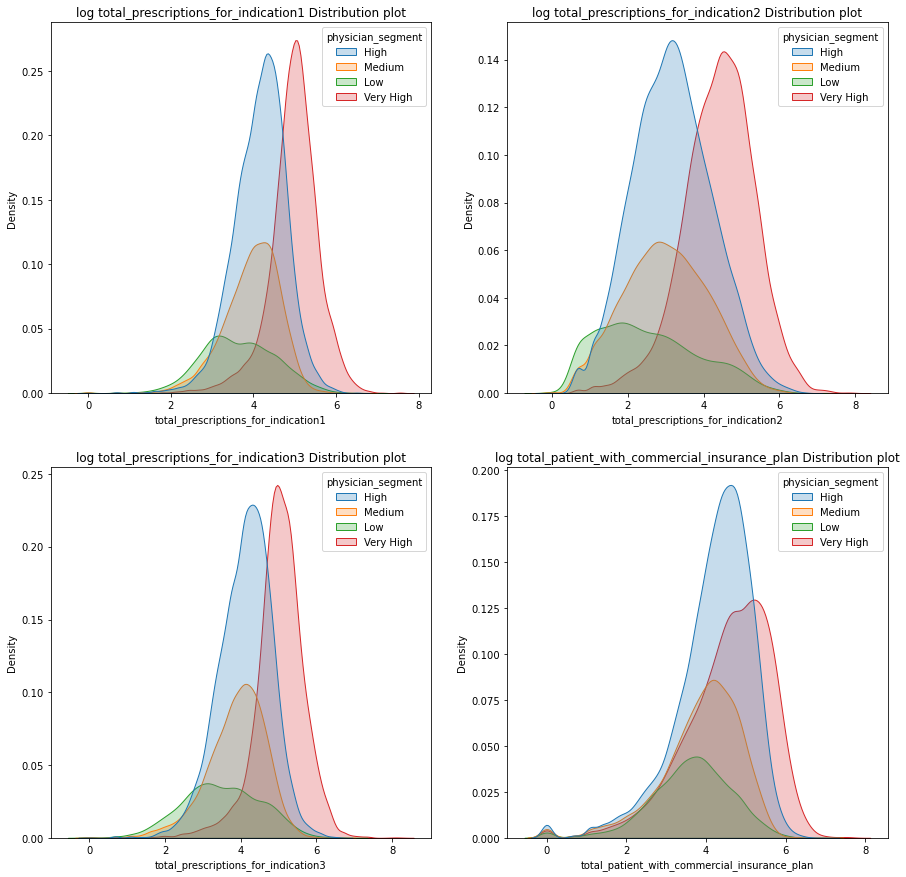

In [110]:
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    plt.title("log "+col+" Distribution plot")
    sns.kdeplot(data=skewed_data,x=col,hue="physician_segment",shade=True)
    

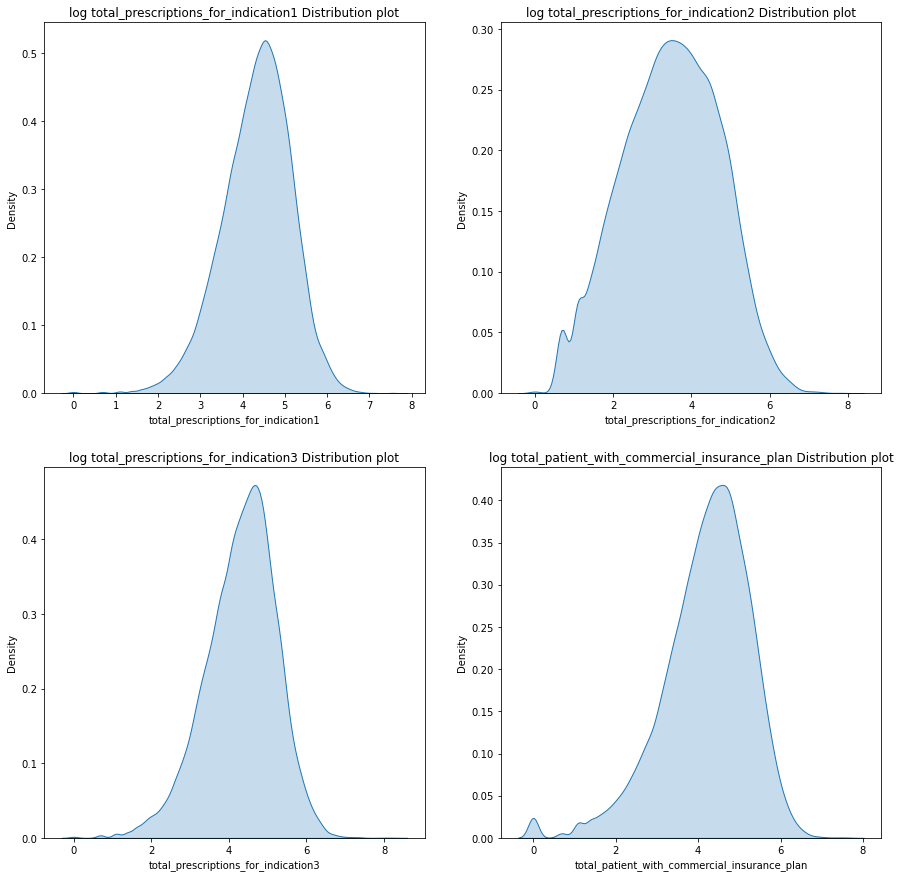

In [111]:
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    plt.title("log "+col+" Distribution plot")
    sns.kdeplot(data=skewed_data,x=col,shade=True)
    

#### Percentile check 

In [118]:
for col in cols:
    print("\n","*"*25,col,"percentile","*"*25,"\n")
    for i in range(0,101,25):
        print("{}th percentile of {} ::{}".format(i,col,np.percentile(data[col],i)))
    


 ************************* total_prescriptions_for_indication1 percentile ************************* 

0th percentile of total_prescriptions_for_indication1 ::0.0
25th percentile of total_prescriptions_for_indication1 ::45.0
50th percentile of total_prescriptions_for_indication1 ::80.0
75th percentile of total_prescriptions_for_indication1 ::132.0
100th percentile of total_prescriptions_for_indication1 ::2029.0

 ************************* total_prescriptions_for_indication2 percentile ************************* 

0th percentile of total_prescriptions_for_indication2 ::0.0
25th percentile of total_prescriptions_for_indication2 ::12.0
50th percentile of total_prescriptions_for_indication2 ::32.0
75th percentile of total_prescriptions_for_indication2 ::80.0
100th percentile of total_prescriptions_for_indication2 ::2932.0

 ************************* total_prescriptions_for_indication3 percentile ************************* 

0th percentile of total_prescriptions_for_indication3 ::0.0
25th per

**Observation**
* all features has huge difference between 75th and 100th percentile so let see 90+ percentiles

In [119]:
for col in cols:
    print("\n","*"*15,col," after 90th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(91+i,col,np.percentile(data[col],91+i)))
    


 *************** total_prescriptions_for_indication1  after 90th percentile *************** 

91th percentile of total_prescriptions_for_indication1 ::208.0
92th percentile of total_prescriptions_for_indication1 ::217.0
93th percentile of total_prescriptions_for_indication1 ::228.0
94th percentile of total_prescriptions_for_indication1 ::240.0
95th percentile of total_prescriptions_for_indication1 ::254.0
96th percentile of total_prescriptions_for_indication1 ::274.0
97th percentile of total_prescriptions_for_indication1 ::303.0
98th percentile of total_prescriptions_for_indication1 ::348.0
99th percentile of total_prescriptions_for_indication1 ::416.0699999999997
100th percentile of total_prescriptions_for_indication1 ::2029.0

 *************** total_prescriptions_for_indication2  after 90th percentile *************** 

91th percentile of total_prescriptions_for_indication2 ::165.0
92th percentile of total_prescriptions_for_indication2 ::176.0
93th percentile of total_prescriptions_f

In [121]:
for col in cols:
    print("\n","*"*15,col," after 99th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(round(99.1+i/10,2),col,np.percentile(data[col],99.1+i/10)))
    


 *************** total_prescriptions_for_indication1  after 99th percentile *************** 

99.1th percentile of total_prescriptions_for_indication1 ::427.0
99.2th percentile of total_prescriptions_for_indication1 ::443.8559999999925
99.3th percentile of total_prescriptions_for_indication1 ::457.4979999999923
99.4th percentile of total_prescriptions_for_indication1 ::471.0
99.5th percentile of total_prescriptions_for_indication1 ::490.0
99.6th percentile of total_prescriptions_for_indication1 ::526.0
99.7th percentile of total_prescriptions_for_indication1 ::558.0
99.8th percentile of total_prescriptions_for_indication1 ::613.2139999999999
99.9th percentile of total_prescriptions_for_indication1 ::707.2139999999927
100.0th percentile of total_prescriptions_for_indication1 ::2029.0

 *************** total_prescriptions_for_indication2  after 99th percentile *************** 

99.1th percentile of total_prescriptions_for_indication2 ::448.0
99.2th percentile of total_prescriptions_for_

**Observation**
* After 90th percentile , there are so much high value which look likes outliers 
* let's assume outliers after 90th percentile and plot the data till 90th percentiles

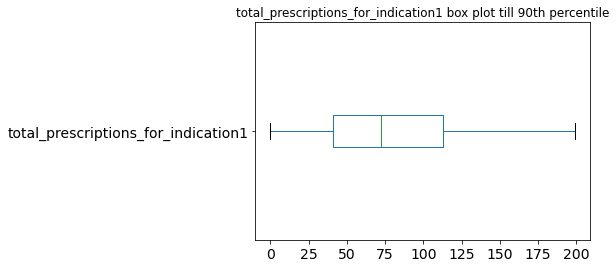

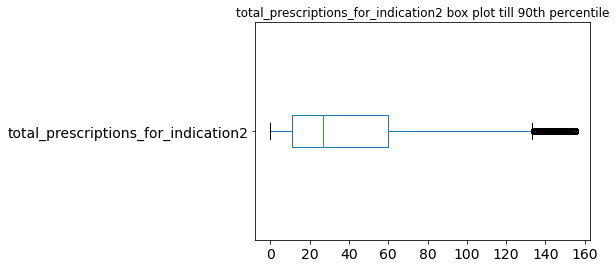

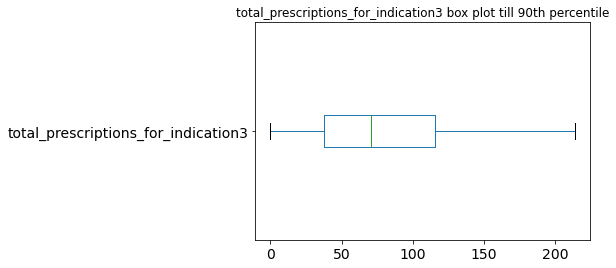

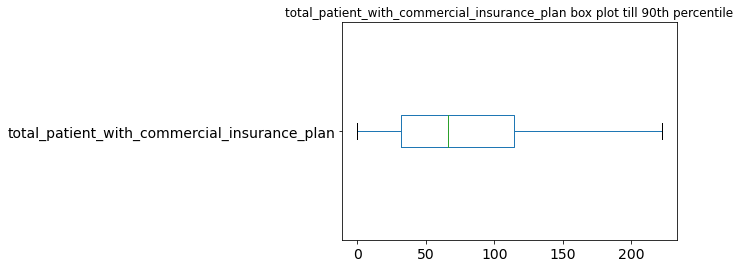

In [123]:
for col in cols:
    till_90th=data[data[col]<np.percentile(data[col],90)][col]
    till_90th.plot(kind="box",title=col+" box plot till 90th percentile",fontsize=14,vert=False)
    plt.show()

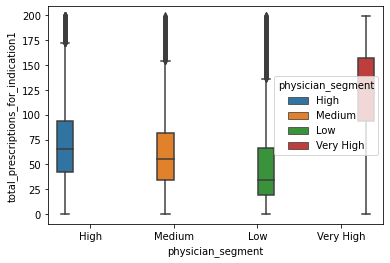

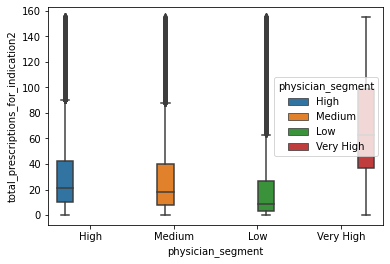

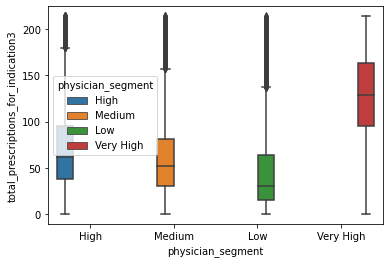

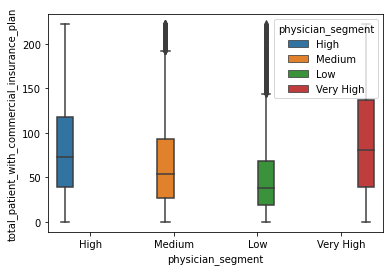

In [127]:
for col in cols:
    till_90th=data[data[col]<np.percentile(data[col],90)][[col,"physician_segment"]]
    sns.boxplot(x="physician_segment",y=col,data=till_90th,hue="physician_segment",)
    plt.show()

In [128]:
cols

['total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan']

<b style="color:red;font-size:20px">So Let's Try to answer few more Hypothesis Questions</b>

**Q. Does total_prescriptions_for_indication1 impact on the physician segment?**

- Yes, certainly we see fatter/denser distributions for 'High' and 'Very High' category

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the 2 categories 'Very High' and 'High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

- Moderate correlation with the target label

- We see more no of outliers in the dataset

**Q. Does total_prescriptions_for_indication2 impact on the physician segment?**

- Yes, certainly we see fatter/denser distributions for 'Very High' category

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the 2 categories 'Very High' and 'High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

- Moderate correlation with the target label

- We see more no of outliers in the dataset

**Q. Does total_patient_with_medicaid_insurance_plan impact on the physician segment?**

- Moderate correlation with the target label

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High' and for remaining categories it is almost same

- We see more no of outliers in the dataset

### Lets See More columns related to BRAND 

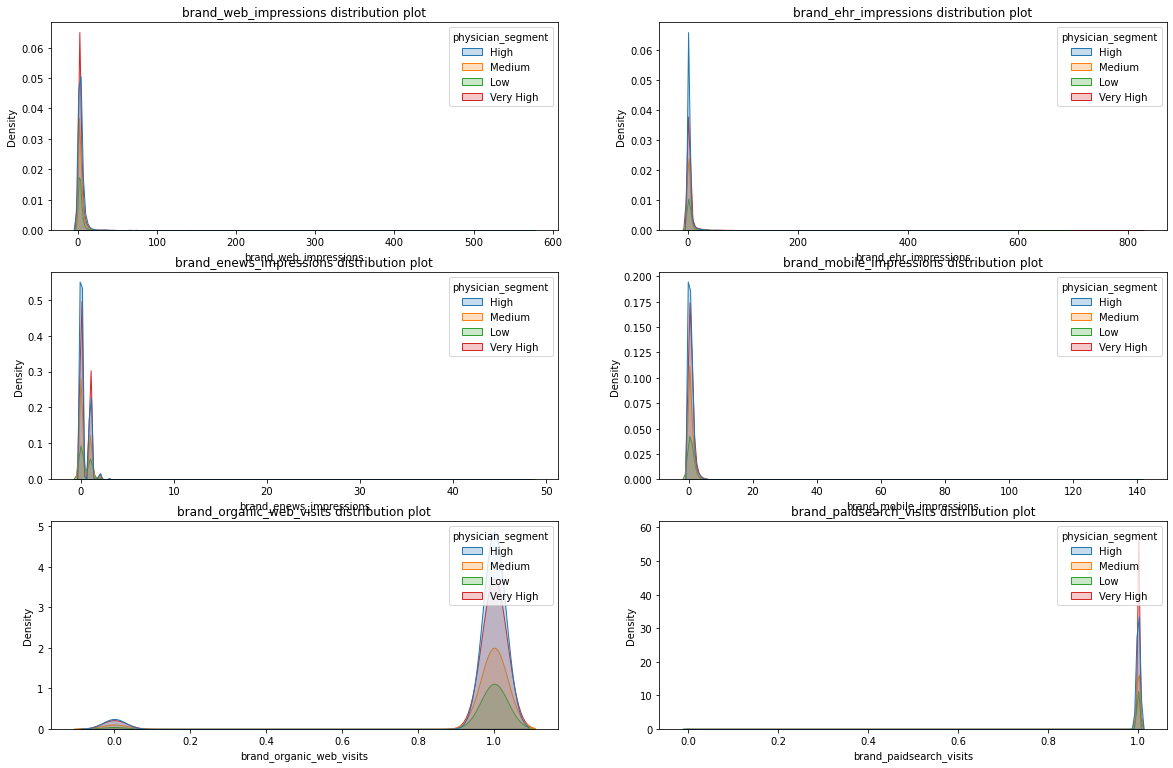

In [139]:
cols=['brand_web_impressions','brand_ehr_impressions','brand_enews_impressions',
                      'brand_mobile_impressions','brand_organic_web_visits','brand_paidsearch_visits']
plt.figure(figsize=(20,13))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1,)
    g=sns.kdeplot(data=data,x=col,hue="physician_segment",shade=True)
    g.set_title(col+" distribution plot")

# Lets again perform all the steps as we did before
- VIF (Multicollienearity check)
- pearson corr coef calculation, 
- correlation matrix, 
- Percentile check, 
- and Boxplots against 90th percentile dataset

#### variance inflation factor 

In [140]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# log_cols.append("physician_segment")
X=data[cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0     brand_web_impressions   1.121801
1     brand_ehr_impressions   1.060078
2   brand_enews_impressions   2.613470
3  brand_mobile_impressions   2.356912
4  brand_organic_web_visits  20.241554
5   brand_paidsearch_visits  20.289378


**Observation**
* It looks like 'brand_paidsearch_visits' and 'brand_organic_web_visits' do have colinearity issue as the value seems to be too much high

#### pearson corr coef calculation

In [141]:
# ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
for i,col in enumerate(cols):
    coef_val, p_val = pearsonr(data[col].values,data["physician_segment_ordinal"])
    print('{}. pearsons correlation coefficient between {} and target:: {}'.format(i+1,col,round(coef_val,3)))
    # interpret the significance
    alpha_val = 0.05
    if p_val > alpha_val:
        print('   Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
    else:
        print('   Samples are correlated (reject H0) p=%.3f' % p_val)


1. pearsons correlation coefficient between brand_web_impressions and target:: 0.002
   Samples are uncorrelated (fail to reject H0) p=0.642
2. pearsons correlation coefficient between brand_ehr_impressions and target:: -0.001
   Samples are uncorrelated (fail to reject H0) p=0.890
3. pearsons correlation coefficient between brand_enews_impressions and target:: -0.016
   Samples are correlated (reject H0) p=0.000
4. pearsons correlation coefficient between brand_mobile_impressions and target:: -0.003
   Samples are uncorrelated (fail to reject H0) p=0.547
5. pearsons correlation coefficient between brand_organic_web_visits and target:: -0.016
   Samples are correlated (reject H0) p=0.000
6. pearsons correlation coefficient between brand_paidsearch_visits and target:: 0.005
   Samples are uncorrelated (fail to reject H0) p=0.309


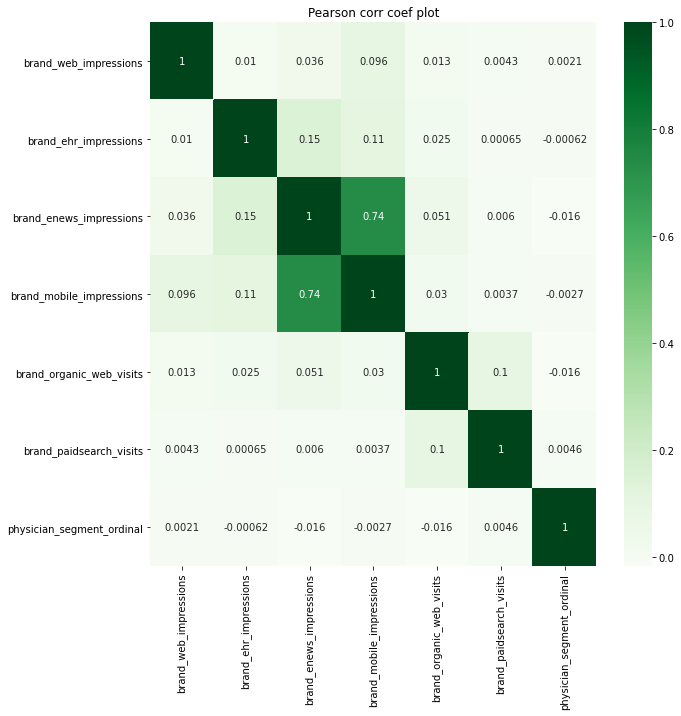

In [142]:
cols.append("physician_segment_ordinal")
cor=data[cols].corr()
plt.figure(figsize=(10,10))
plt.title("Pearson corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

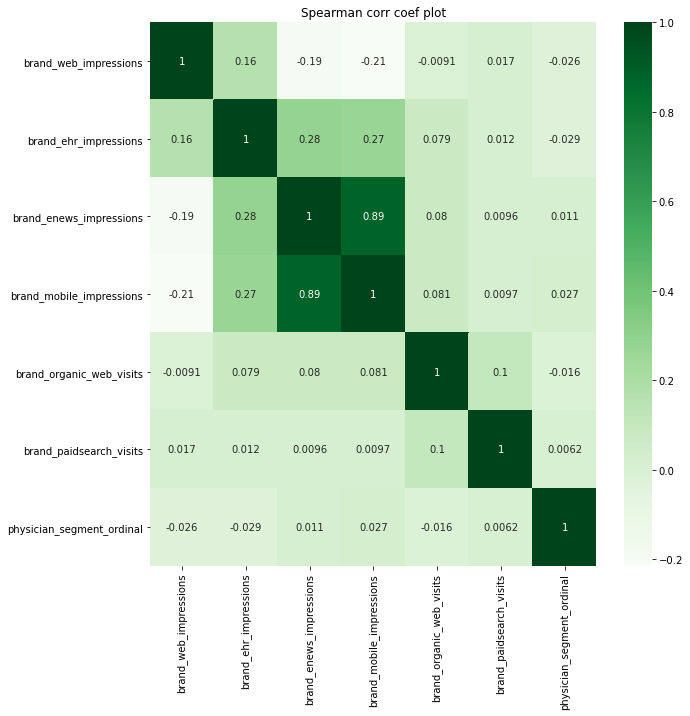

In [143]:
cor=data[cols].corr(method="spearman")
plt.figure(figsize=(10,10))
plt.title("Spearman corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

**Observation**
- From the pearson correlation coeff calculations, and the above correlation matrix we see that almost all of the fields do not correlate or very less correlation with target variable.

- We also observe that 'brand_enews_impressions','brand_mobile_impressions' are highly colinear, so we can ignore 1 field while modeling

- above feature are  skewed so lets apply log on data then we will see how useful are them

In [144]:
cols.remove("physician_segment_ordinal")
for col in cols:
    skewed_data[col]=np.log1p(data[col])

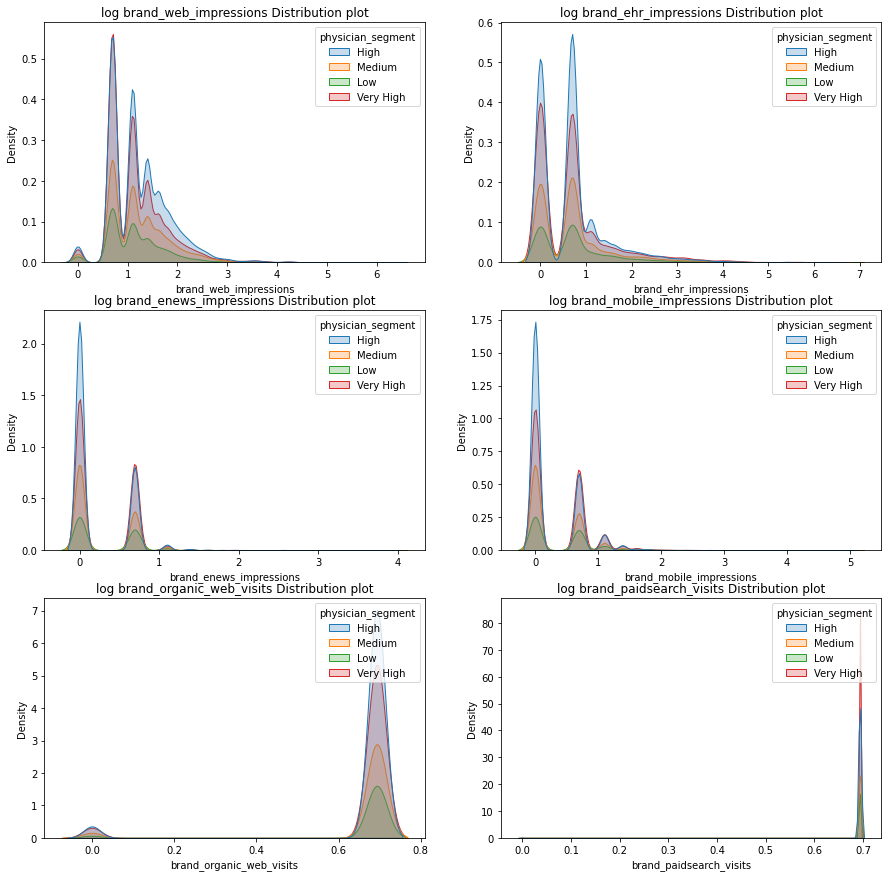

In [146]:
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.title("log "+col+" Distribution plot")
    sns.kdeplot(data=skewed_data,x=col,hue="physician_segment",shade=True)
    

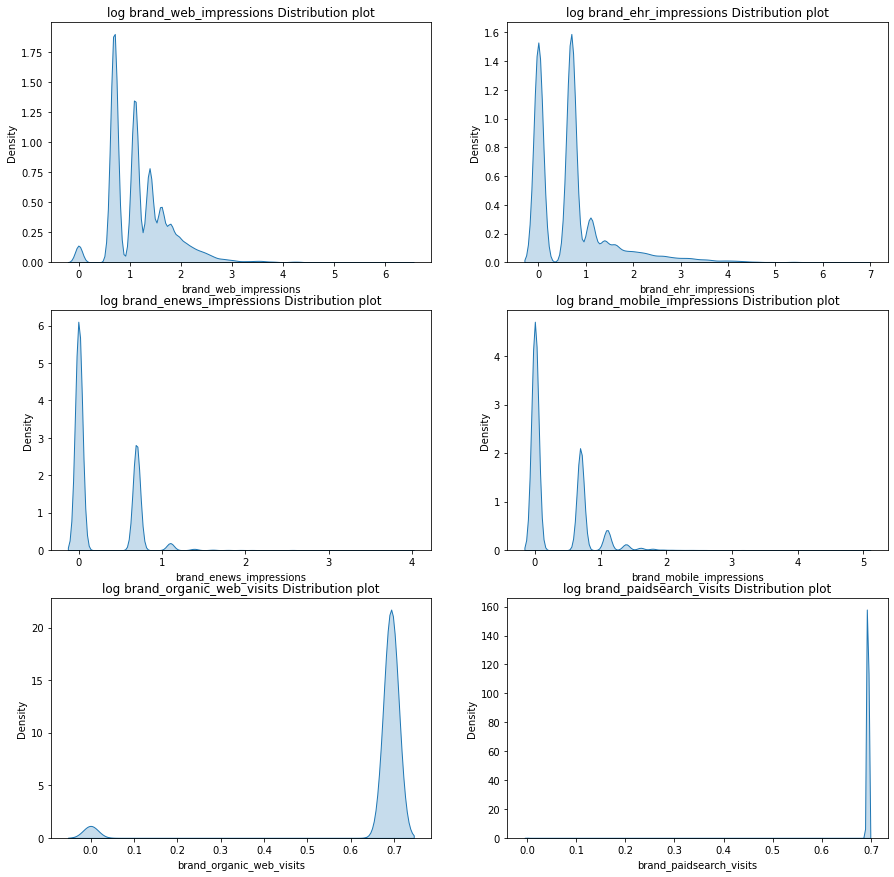

In [153]:
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.title("log "+col+" Distribution plot")
    sns.kdeplot(data=skewed_data,x=col,shade=True)
    

#### Percentile check 

In [148]:
for col in cols:
    print("\n","*"*25,col,"percentile","*"*25,"\n")
    for i in range(0,101,25):
        print("{}th percentile of {} ::{}".format(i,col,np.percentile(data[col],i)))
    


 ************************* brand_web_impressions percentile ************************* 

0th percentile of brand_web_impressions ::0.0
25th percentile of brand_web_impressions ::1.0
50th percentile of brand_web_impressions ::2.0
75th percentile of brand_web_impressions ::4.0
100th percentile of brand_web_impressions ::572.0

 ************************* brand_ehr_impressions percentile ************************* 

0th percentile of brand_ehr_impressions ::0.0
25th percentile of brand_ehr_impressions ::0.0
50th percentile of brand_ehr_impressions ::1.0
75th percentile of brand_ehr_impressions ::1.0
100th percentile of brand_ehr_impressions ::819.0

 ************************* brand_enews_impressions percentile ************************* 

0th percentile of brand_enews_impressions ::0.0
25th percentile of brand_enews_impressions ::0.0
50th percentile of brand_enews_impressions ::0.0
75th percentile of brand_enews_impressions ::1.0
100th percentile of brand_enews_impressions ::48.0

 *********

**Observation**
* all features has huge difference between 75th and 100th percentile so let see 90+ percentiles

In [149]:
for col in cols:
    print("\n","*"*15,col," after 90th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(91+i,col,np.percentile(data[col],91+i)))
    


 *************** brand_web_impressions  after 90th percentile *************** 

91th percentile of brand_web_impressions ::7.0
92th percentile of brand_web_impressions ::7.0
93th percentile of brand_web_impressions ::8.0
94th percentile of brand_web_impressions ::8.0
95th percentile of brand_web_impressions ::9.0
96th percentile of brand_web_impressions ::10.0
97th percentile of brand_web_impressions ::11.0
98th percentile of brand_web_impressions ::14.0
99th percentile of brand_web_impressions ::22.0
100th percentile of brand_web_impressions ::572.0

 *************** brand_ehr_impressions  after 90th percentile *************** 

91th percentile of brand_ehr_impressions ::6.0
92th percentile of brand_ehr_impressions ::6.0
93th percentile of brand_ehr_impressions ::8.0
94th percentile of brand_ehr_impressions ::9.0
95th percentile of brand_ehr_impressions ::11.0
96th percentile of brand_ehr_impressions ::14.0
97th percentile of brand_ehr_impressions ::19.0
98th percentile of brand_ehr_

In [150]:
for col in cols:
    print("\n","*"*15,col," after 99th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(round(99.1+i/10,2),col,np.percentile(data[col],99.1+i/10)))
    


 *************** brand_web_impressions  after 99th percentile *************** 

99.1th percentile of brand_web_impressions ::26.0
99.2th percentile of brand_web_impressions ::29.0
99.3th percentile of brand_web_impressions ::31.0
99.4th percentile of brand_web_impressions ::33.0
99.5th percentile of brand_web_impressions ::36.0
99.6th percentile of brand_web_impressions ::42.0
99.7th percentile of brand_web_impressions ::54.0
99.8th percentile of brand_web_impressions ::70.0
99.9th percentile of brand_web_impressions ::124.0
100.0th percentile of brand_web_impressions ::572.0

 *************** brand_ehr_impressions  after 99th percentile *************** 

99.1th percentile of brand_ehr_impressions ::51.0
99.2th percentile of brand_ehr_impressions ::56.0
99.3th percentile of brand_ehr_impressions ::61.0
99.4th percentile of brand_ehr_impressions ::67.0
99.5th percentile of brand_ehr_impressions ::75.0
99.6th percentile of brand_ehr_impressions ::85.42799999999988
99.7th percentile of b

**Observation**
* brand_organic_web_visits and brand_paidsearch_visits are equaly distribute but for others feature after 99.9th percentile is so high
* let's assume outliers after 90th percentile and plot the data till 90th percentiles 

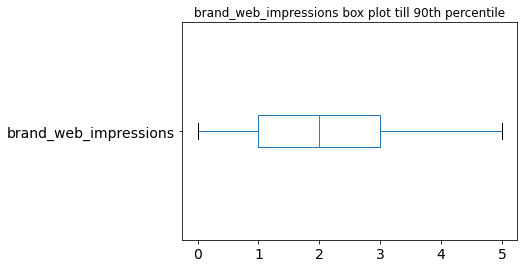

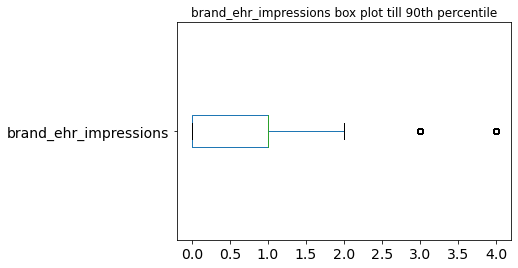

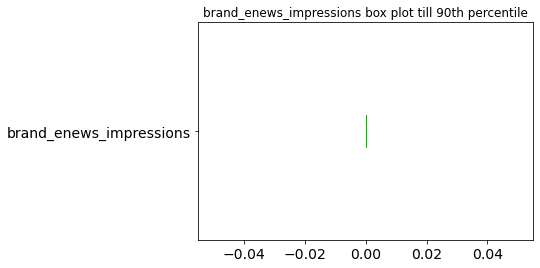

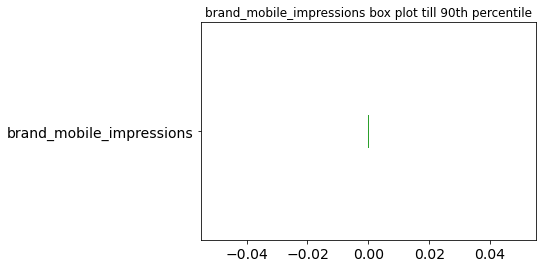

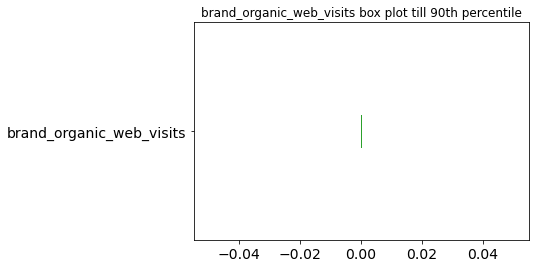

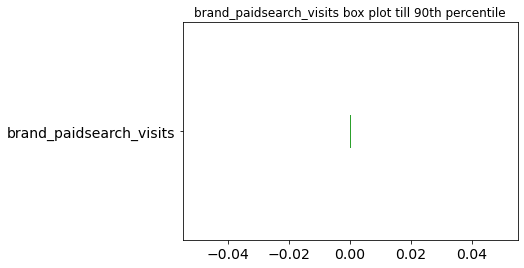

In [151]:
for col in cols:
    till_90th=data[data[col]<np.percentile(data[col],90)][col]
    till_90th.plot(kind="box",title=col+" box plot till 90th percentile",fontsize=14,vert=False)
    plt.show()

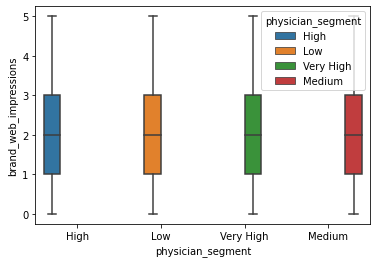

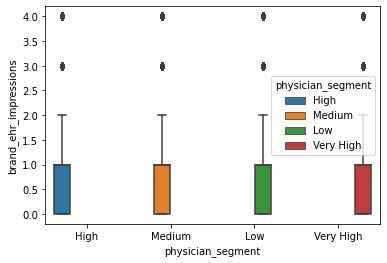

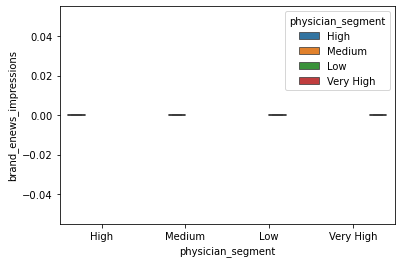

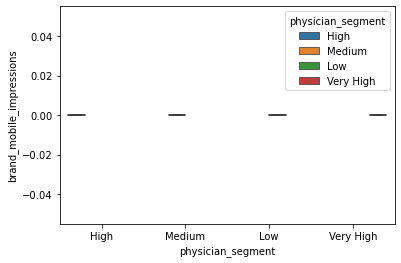

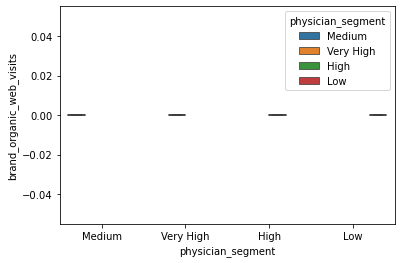

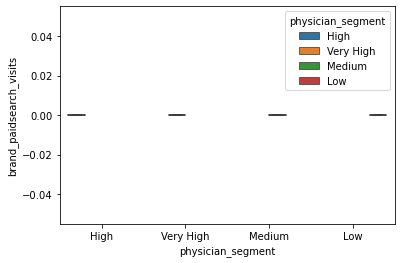

In [152]:
for col in cols:
    till_90th=data[data[col]<np.percentile(data[col],90)][[col,"physician_segment"]]
    sns.boxplot(x="physician_segment",y=col,data=till_90th,hue="physician_segment",)
    plt.show()

<b style="color:red;font-size:20px">So Let's Try to answer few more Hypothesis Questions</b>

**Q. Does brand_web_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_ehr_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 


- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_enews_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 


- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_mobile_impressions impact on the physician segment?**

- Tried plotting Distribution plot and could not derive much insights, then tried PDF and CDF and almost all the segments behave the same. 


- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_organic_web_visits impact on the physician segment?**

- Almost all records belong to brand_organic_web_visits, there are no records without brand_organic_web_visits

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

**Q. Does brand_paidsearch_visits impact on the physician segment?**

- Almost all records belong to brand_paidsearch_visits, there are no records without brand_paidsearch_visits.

- In addition to it, even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the there is no proper pattern recognized.

### Lets take **competitor prescriptions** related search columns and perform its analysis with class label

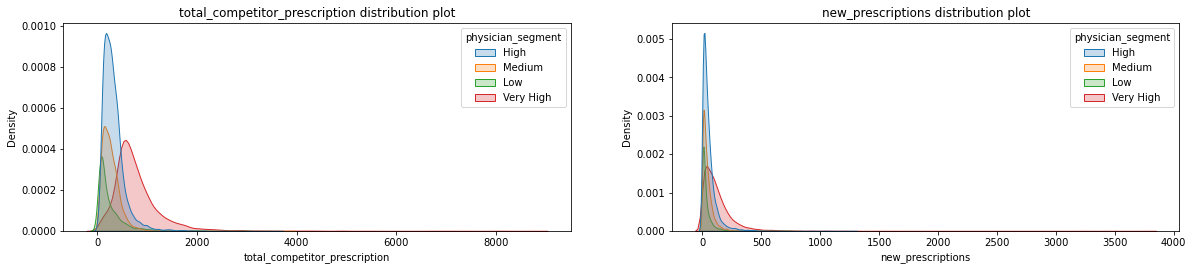

In [160]:
cols=['total_competitor_prescription','new_prescriptions']
plt.figure(figsize=(20,13))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1,)
    g=sns.kdeplot(data=data,x=col,hue="physician_segment",shade=True)
    g.set_title(col+" distribution plot")

# Lets again perform all the steps as we did before
- VIF (Multicollienearity check)
- pearson corr coef calculation, 
- correlation matrix, 
- Percentile check, 
- and Boxplots against 90th percentile dataset

#### variance inflation factor 

In [161]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# log_cols.append("physician_segment")
X=data[cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                         feature       VIF
0  total_competitor_prescription  2.944205
1              new_prescriptions  2.944205


**Observation**
* Both feature have VIF  value < 10 so no collinearality.

#### pearson corr coef calculation

In [162]:
# ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
for i,col in enumerate(cols):
    coef_val, p_val = pearsonr(data[col].values,data["physician_segment_ordinal"])
    print('{}. pearsons correlation coefficient between {} and target:: {}'.format(i+1,col,round(coef_val,3)))
    # interpret the significance
    alpha_val = 0.05
    if p_val > alpha_val:
        print('   Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
    else:
        print('   Samples are correlated (reject H0) p=%.3f' % p_val)


1. pearsons correlation coefficient between total_competitor_prescription and target:: 0.462
   Samples are correlated (reject H0) p=0.000
2. pearsons correlation coefficient between new_prescriptions and target:: 0.313
   Samples are correlated (reject H0) p=0.000


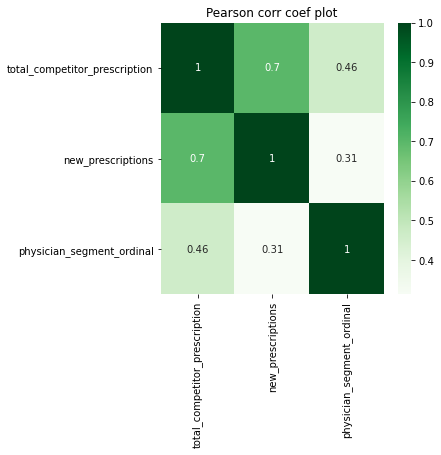

In [163]:
cols.append("physician_segment_ordinal")
cor=data[cols].corr()
plt.figure(figsize=(5,5))
plt.title("Pearson corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

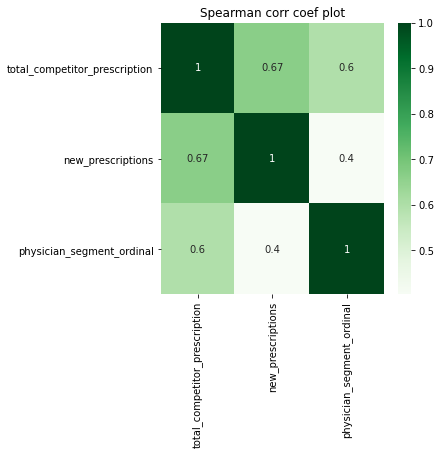

In [165]:
cor=data[cols].corr(method="spearman")
plt.figure(figsize=(5,5))
plt.title("Spearman corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

In [166]:
cols.remove("physician_segment_ordinal")
for col in cols:
    skewed_data[col]=np.log1p(data[col])

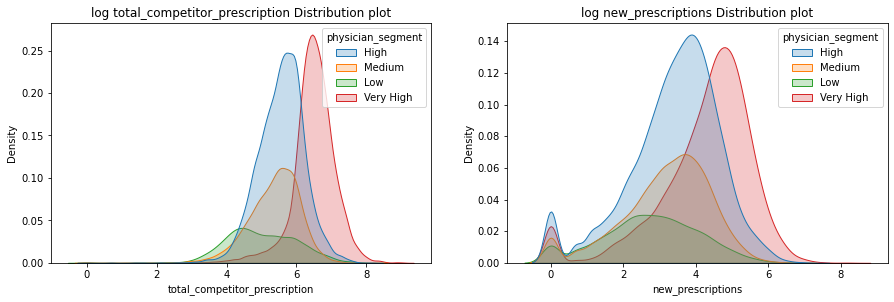

In [167]:
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.title("log "+col+" Distribution plot")
    sns.kdeplot(data=skewed_data,x=col,hue="physician_segment",shade=True)
    

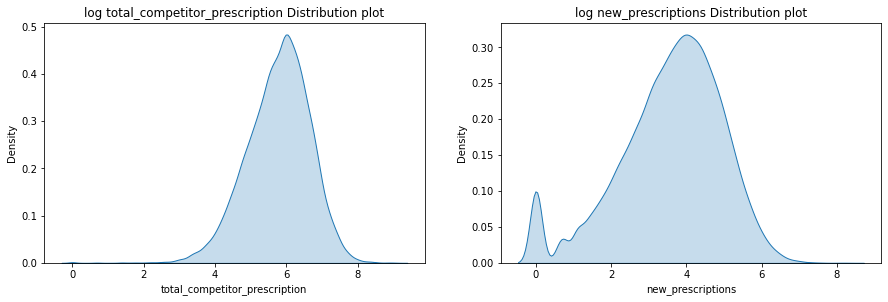

In [168]:
plt.figure(figsize=(15,15))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.title("log "+col+" Distribution plot")
    sns.kdeplot(data=skewed_data,x=col,shade=True)
    

#### Percentile check 

In [169]:
for col in cols:
    print("\n","*"*25,col,"percentile","*"*25,"\n")
    for i in range(0,101,25):
        print("{}th percentile of {} ::{}".format(i,col,np.percentile(data[col],i)))
    


 ************************* total_competitor_prescription percentile ************************* 

0th percentile of total_competitor_prescription ::0.0
25th percentile of total_competitor_prescription ::181.0
50th percentile of total_competitor_prescription ::343.0
75th percentile of total_competitor_prescription ::585.0
100th percentile of total_competitor_prescription ::8815.0

 ************************* new_prescriptions percentile ************************* 

0th percentile of new_prescriptions ::0.0
25th percentile of new_prescriptions ::15.0
50th percentile of new_prescriptions ::41.0
75th percentile of new_prescriptions ::92.0
100th percentile of new_prescriptions ::3790.0


**Observation**
* all features has huge difference between 75th and 100th percentile so let see 90+ percentiles

In [170]:
for col in cols:
    print("\n","*"*15,col," after 90th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(91+i,col,np.percentile(data[col],91+i)))
    


 *************** total_competitor_prescription  after 90th percentile *************** 

91th percentile of total_competitor_prescription ::953.0
92th percentile of total_competitor_prescription ::995.0
93th percentile of total_competitor_prescription ::1046.0
94th percentile of total_competitor_prescription ::1106.0
95th percentile of total_competitor_prescription ::1187.0
96th percentile of total_competitor_prescription ::1280.0
97th percentile of total_competitor_prescription ::1414.0
98th percentile of total_competitor_prescription ::1601.0
99th percentile of total_competitor_prescription ::1933.0699999999997
100th percentile of total_competitor_prescription ::8815.0

 *************** new_prescriptions  after 90th percentile *************** 

91th percentile of new_prescriptions ::185.0
92th percentile of new_prescriptions ::197.0
93th percentile of new_prescriptions ::210.0
94th percentile of new_prescriptions ::226.0
95th percentile of new_prescriptions ::248.0
96th percentile of

In [171]:
for col in cols:
    print("\n","*"*15,col," after 99th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(round(99.1+i/10,2),col,np.percentile(data[col],99.1+i/10)))
    


 *************** total_competitor_prescription  after 99th percentile *************** 

99.1th percentile of total_competitor_prescription ::1993.962999999996
99.2th percentile of total_competitor_prescription ::2060.5679999999775
99.3th percentile of total_competitor_prescription ::2129.4979999999923
99.4th percentile of total_competitor_prescription ::2212.6419999999925
99.5th percentile of total_competitor_prescription ::2316.0
99.6th percentile of total_competitor_prescription ::2460.1399999999994
99.7th percentile of total_competitor_prescription ::2684.3829999999143
99.8th percentile of total_competitor_prescription ::2948.0
99.9th percentile of total_competitor_prescription ::3794.41999999978
100.0th percentile of total_competitor_prescription ::8815.0

 *************** new_prescriptions  after 99th percentile *************** 

99.1th percentile of new_prescriptions ::483.0
99.2th percentile of new_prescriptions ::501.8559999999925
99.3th percentile of new_prescriptions ::531.7

**Observation**
* It seems, both feature have outliers after 90th percentiles
* let's assume outliers after 90th percentile and plot the data till 90th percentiles 

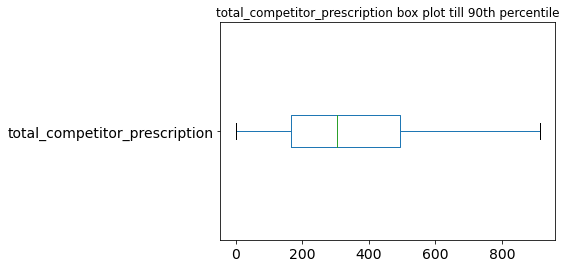

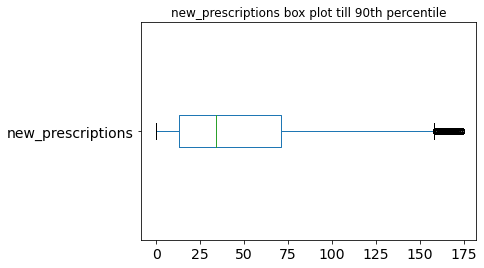

In [172]:
for col in cols:
    till_90th=data[data[col]<np.percentile(data[col],90)][col]
    till_90th.plot(kind="box",title=col+" box plot till 90th percentile",fontsize=14,vert=False)
    plt.show()

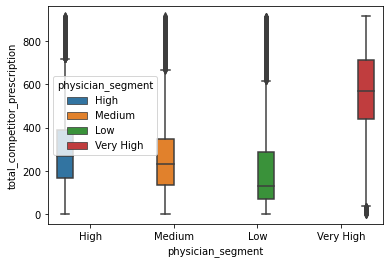

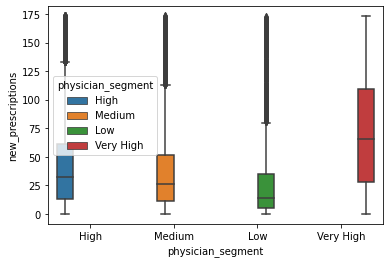

In [173]:
for col in cols:
    till_90th=data[data[col]<np.percentile(data[col],90)][[col,"physician_segment"]]
    sns.boxplot(x="physician_segment",y=col,data=till_90th,hue="physician_segment",)
    plt.show()

<b style="color:red;font-size:20px">So Let's Try to answer few more Hypothesis Questions</b>

**Q. Does total_competitor_prescription impact on the physician segment?**

- Plotted the distribution Chart, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

- good correlation with the target label

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

**Q. Does new_prescriptions impact on the physician segment?**

- Plotted the distribution Chart, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

- good correlation with the target label

- In addition to it we even checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High'. we see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling. 


### Lets take **Locality,physician age and tenure** related search columns and perform its analysis with class label

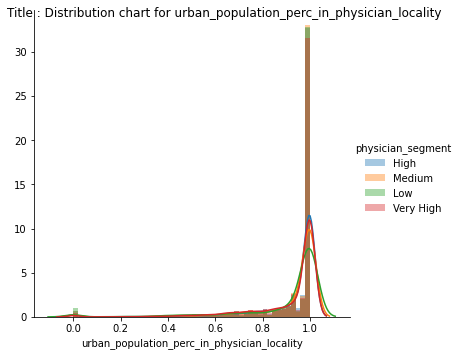

In [182]:
g = sns.FacetGrid(data[['urban_population_perc_in_physician_locality','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "urban_population_perc_in_physician_locality") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for urban_population_perc_in_physician_locality ')
plt.show();

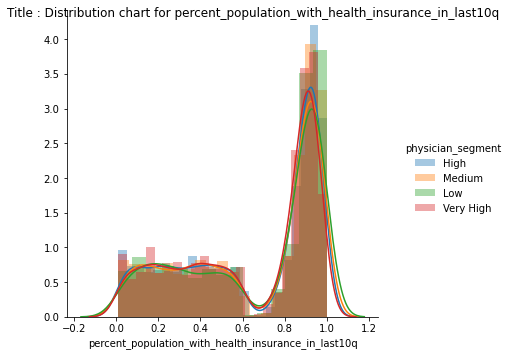

In [179]:
g = sns.FacetGrid(data[['percent_population_with_health_insurance_in_last10q','physician_segment']], hue="physician_segment", size=5) \
.map(sns.distplot, "percent_population_with_health_insurance_in_last10q") \
.add_legend();
g.fig.suptitle('Title : Distribution chart for percent_population_with_health_insurance_in_last10q ')
plt.show();

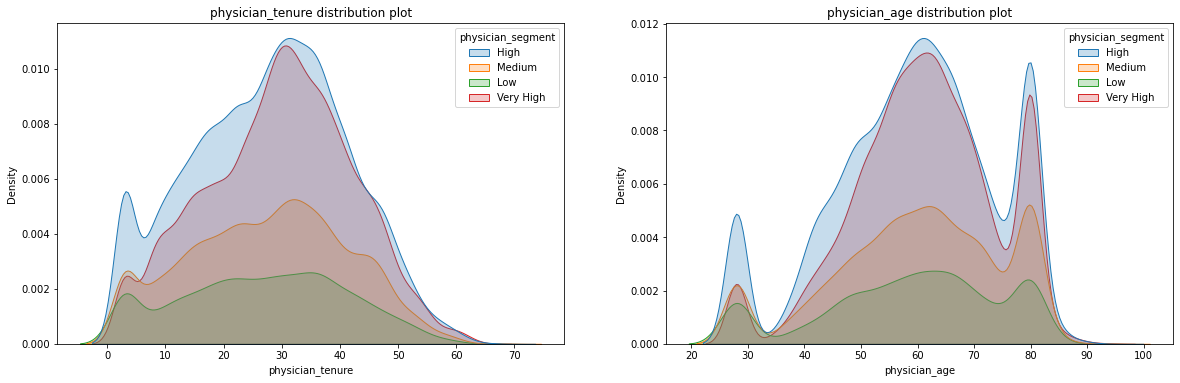

In [184]:
cols=['physician_tenure',"physician_age"]
plt.figure(figsize=(20,13))
for i,col in enumerate(cols):
    plt.subplot(2,2,i+1,)
    g=sns.kdeplot(data=data,x=col,hue="physician_segment",shade=True)
    g.set_title(col+" distribution plot")

# Lets again perform all the steps as we did before
- VIF (Multicollienearity check)
- pearson corr coef calculation, 
- correlation matrix, 
- Percentile check, 
- and Boxplots against 90th percentile dataset

#### variance inflation factor 

In [185]:
# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# log_cols.append("physician_segment")
X=data[cols]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature       VIF
0  physician_tenure  7.927651
1     physician_age  7.927651


**Observation**
* both have high value of VIF so they might be multicollinear.

#### pearson corr coef calculation

In [186]:
# ref: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
for i,col in enumerate(cols):
    coef_val, p_val = pearsonr(data[col].values,data["physician_segment_ordinal"])
    print('{}. pearsons correlation coefficient between {} and target:: {}'.format(i+1,col,round(coef_val,3)))
    # interpret the significance
    alpha_val = 0.05
    if p_val > alpha_val:
        print('   Samples are uncorrelated (fail to reject H0) p=%.3f' % p_val)
    else:
        print('   Samples are correlated (reject H0) p=%.3f' % p_val)


1. pearsons correlation coefficient between physician_tenure and target:: 0.065
   Samples are correlated (reject H0) p=0.000
2. pearsons correlation coefficient between physician_age and target:: 0.046
   Samples are correlated (reject H0) p=0.000


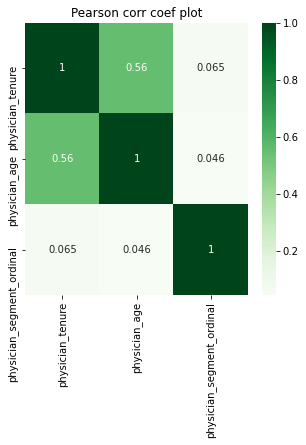

In [187]:
cols.append("physician_segment_ordinal")
cor=data[cols].corr()
plt.figure(figsize=(5,5))
plt.title("Pearson corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

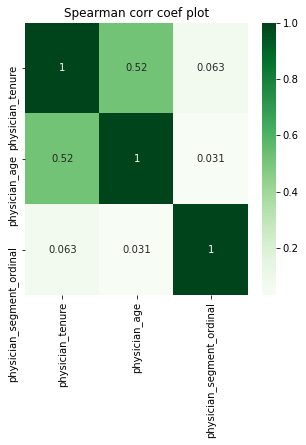

In [188]:
cor=data[cols].corr(method="spearman")
plt.figure(figsize=(5,5))
plt.title("Spearman corr coef plot")
sns.heatmap(cor,annot=True,cmap=plt.cm.Greens)
plt.show()

#### Percentile check 

In [191]:
for col in cols:
    print("\n","*"*25,col,"percentile","*"*25,"\n")
    for i in range(0,101,25):
        print("{}th percentile of {} ::{}".format(i,col,np.percentile(data[col],i)))
    


 ************************* physician_tenure percentile ************************* 

0th percentile of physician_tenure ::3.0
25th percentile of physician_tenure ::18.0
50th percentile of physician_tenure ::29.0
75th percentile of physician_tenure ::38.0
100th percentile of physician_tenure ::68.0

 ************************* physician_age percentile ************************* 

0th percentile of physician_age ::28.0
25th percentile of physician_age ::51.0
50th percentile of physician_age ::61.0
75th percentile of physician_age ::70.0
100th percentile of physician_age ::94.0


**Observation**
* all features has huge difference between 75th and 100th percentile so let see 90+ percentiles

In [192]:
for col in cols:
    print("\n","*"*15,col," after 90th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(91+i,col,np.percentile(data[col],91+i)))
    


 *************** physician_tenure  after 90th percentile *************** 

91th percentile of physician_tenure ::46.0
92th percentile of physician_tenure ::47.0
93th percentile of physician_tenure ::47.0
94th percentile of physician_tenure ::48.0
95th percentile of physician_tenure ::49.0
96th percentile of physician_tenure ::50.0
97th percentile of physician_tenure ::52.0
98th percentile of physician_tenure ::53.0
99th percentile of physician_tenure ::56.0
100th percentile of physician_tenure ::68.0

 *************** physician_age  after 90th percentile *************** 

91th percentile of physician_age ::80.0
92th percentile of physician_age ::80.0
93th percentile of physician_age ::80.0
94th percentile of physician_age ::80.0
95th percentile of physician_age ::80.0
96th percentile of physician_age ::80.0
97th percentile of physician_age ::80.0
98th percentile of physician_age ::80.0
99th percentile of physician_age ::82.0
100th percentile of physician_age ::94.0


In [193]:
for col in cols:
    print("\n","*"*15,col," after 99th percentile","*"*15,"\n")
    for i in range(0,10):
        print("{}th percentile of {} ::{}".format(round(99.1+i/10,2),col,np.percentile(data[col],99.1+i/10)))
    


 *************** physician_tenure  after 99th percentile *************** 

99.1th percentile of physician_tenure ::56.0
99.2th percentile of physician_tenure ::57.0
99.3th percentile of physician_tenure ::58.0
99.4th percentile of physician_tenure ::58.0
99.5th percentile of physician_tenure ::59.0
99.6th percentile of physician_tenure ::59.0
99.7th percentile of physician_tenure ::60.0
99.8th percentile of physician_tenure ::60.0
99.9th percentile of physician_tenure ::62.0
100.0th percentile of physician_tenure ::68.0

 *************** physician_age  after 99th percentile *************** 

99.1th percentile of physician_age ::83.0
99.2th percentile of physician_age ::83.0
99.3th percentile of physician_age ::84.0
99.4th percentile of physician_age ::84.0
99.5th percentile of physician_age ::84.0
99.6th percentile of physician_age ::85.0
99.7th percentile of physician_age ::85.0
99.8th percentile of physician_age ::86.0
99.9th percentile of physician_age ::88.0
100.0th percentile of 

**Observation**
* It seems, both feature have very less outliers after 95th percentiles
* let's assume outliers after 95th percentile and plot the data till 95th percentiles 

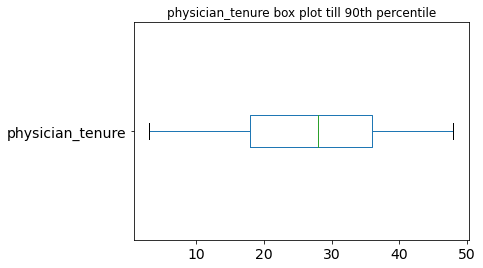

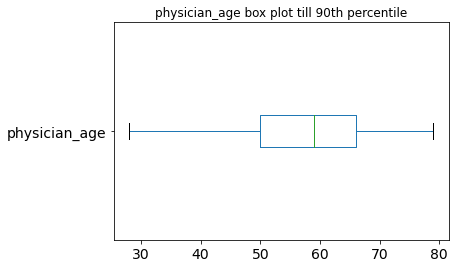

In [196]:
for col in cols:
    till_95th=data[data[col]<np.percentile(data[col],95)][col]
    till_95th.plot(kind="box",title=col+" box plot till 90th percentile",fontsize=14,vert=False)
    plt.show()

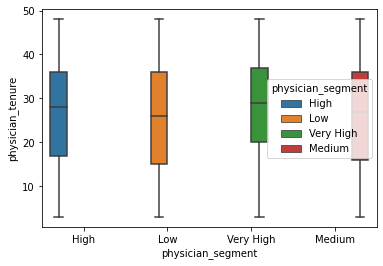

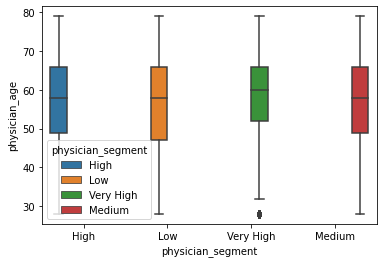

In [195]:
for col in cols:
    till_95th=data[data[col]<np.percentile(data[col],95)][[col,"physician_segment"]]
    sns.boxplot(x="physician_segment",y=col,data=till_95th,hue="physician_segment",)
    plt.show()

<b style="color:red;font-size:20px">So Let's Try to answer few more Hypothesis Questions</b>
**Q. Does urban_population_perc_in_physician_locality impact on the physician segment?**

A. It does not really matter as all the segments behave the same. Most of the population lies in urban areas

**Q. Does percent_population_with_health_insurance_in_last10q impact on the physician segment?**

A. It does not really matter as all the segments behave the same. 

Morever we have seen the Correlation matrix as well, which does not provide any insight 


**Q. Does physician_tenure impact on the physician segment?**

A - It looks like for 'Very High' segment, the physician tenure is slightly more than other segments.

Correlation matrix also shows the same

**Q. Does physician_age impact on the physician segment?**

A.  It looks like for 'Very High' segment, the physician age is slightly more than other segments.

Correlation matrix also shows the same

# Correlation HeatMaps (for All impacting variables v/s Target Label)

In [197]:
final_data = pd.DataFrame(data, columns = ['brand_prescribed','total_representative_visits','total_sample_dropped',
                          'physician_hospital_affiliation','physician_in_group_practice',
                          'total_prescriptions_for_indication1','total_prescriptions_for_indication2',
                          'total_patient_with_commercial_insurance_plan','total_patient_with_medicare_insurance_plan','total_patient_with_medicaid_insurance_plan',
                          'total_competitor_prescription','new_prescriptions','physician_segment_ordinal'])

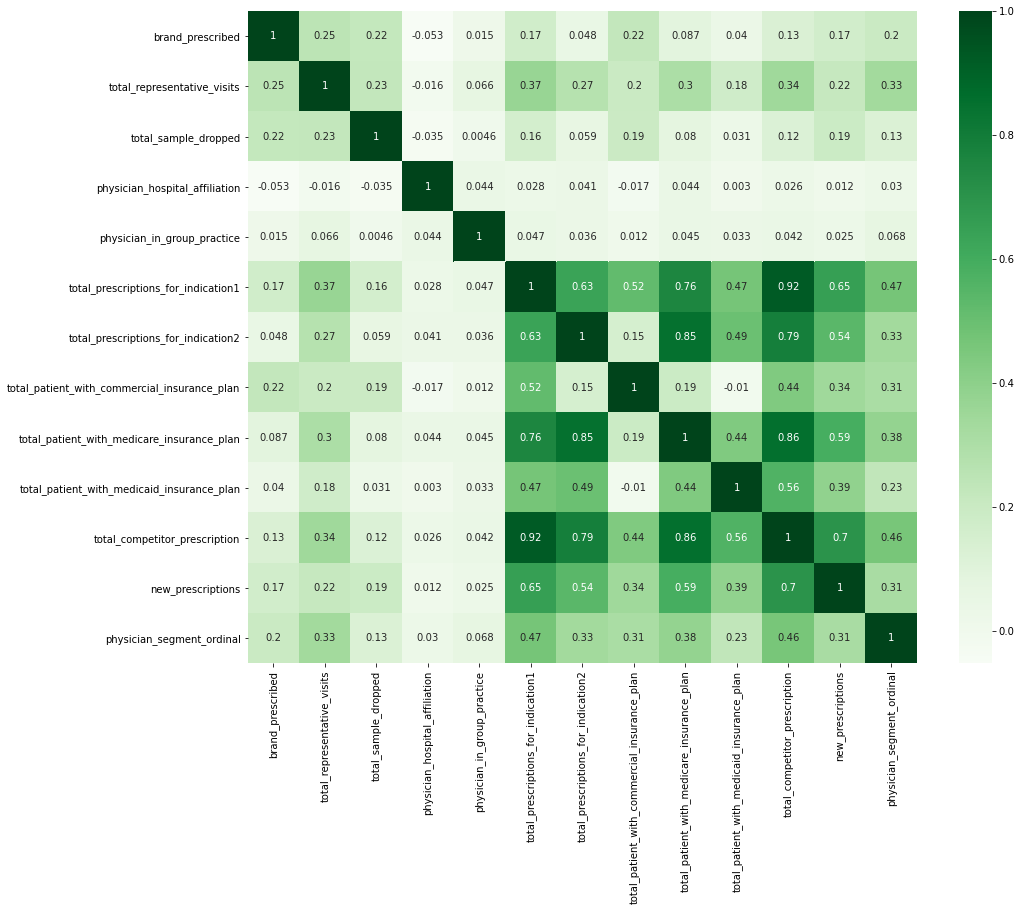

In [198]:
plt.figure(figsize=(15,12))
final_data_cor = final_data.corr()
sns.heatmap(final_data_cor, annot=True, cmap=plt.cm.Greens)
plt.show()     

In [200]:
os.path.join(base_dir,"final_data.csv")

'E:\\WorkStation\\Predict Physician and Drug\\final_data.csv'

In [202]:
# Save final data after EDA 
if not os.path.isfile(os.path.join(base_dir,"final_data.csv")):
    final_data.to_csv(os.path.join(base_dir,"final_data.csv"),index_label=False)

# <b style="color:red;font-size:24px">FINAL EDA CONCLUSIONS:</b>

***1. FROM CATEGORICAL VARIABLES EDA*** 

Below are the variables which impact

**Q. Does gender impact on the physician segment?**

A. Yes, as you can see Very High and High Category percentage is more for Male population, than Female. For Female population we see that Medium and Low constitute more percentage

**Q. Does physician speciality impact on the physician segment?**

A. Yes the physician with speciality in nephrology tend to prescribe more than the urology and others category

***2. FROM NUMERICAL VARIABLES EDA***

Below are the variables which impact

**Q. Does brand_prescribed impact on the physician segment?**

A. Yes, if brand is prescribed the previous quarters, it is more likely that physician will prescribe it in next quarter.

**Q. Does total_representative_visits impact on the physician segment?**

A. Yes, from the distribution chart we see that if the no of representative visits are high, then there is maximum chance that the physician will prescribe the medicine.

**Q. Does total_sample_dropped impact on the physician segment?**

A. Yes, it certainly impacts as we are seeing maximum distribution for the 2 segments (Very High and High Categories)

**Q. Does physician_hospital_affiliation impact on the physician segment?**

A. Yes, it looks like lot of physicians do not have hospital affiliations and are more likely to prescribe the medicines.

**Q. Does physician_in_group_practice impact on the physician segment?**

A. Yes, from the distribution chart we see that if the physician is in group setup then he is more likely to prescribe the medicine.

**Q. Does total_prescriptions_for_indication1, total_prescriptions_for_indication2, total_prescriptions_for_indication3 impact on the physician segment?**

A. For total_prescriptions_for_indication1, and total_prescriptions_for_indication3 definitely have greater distribution for the segment 'Very High' and 'High', and lesser distribution for 'Low' and 'Medium'. For total_prescriptions_for_indication2 we do not see any proper distribution to infer

**Q. Does total_patient_with_commercial_insurance_plan impact on the physician segment?**

A. Yes, certainly we see fatter distributions for 'High' and 'Very High' category

**Q. Does total_patient_with_medicare_insurance_plan impact on the physician segment?**

A. Yes, certainly we see fatter distributions for 'Very High' category

**Q. Does total_patient_with_medicaid_insurance_plan impact on the physician segment?**

A. We have checked the percentile of distribution and checked the data below 90th percentile and plotted the box plots and we see that the target variable does get impacted for the category 'Very High' and for remaining categories it is almost same

**Q. Does brand search and web search related columns impact on the physician segment?**

A. There are about 6 variables, and have tried checking PDF, CDF, box plots, percentiles etc. As we could not find any pattern, cannot make any inference.

**Q. Does total_competitor_prescription impact on the physician segment?**

A. Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much.

**Q. Does new_prescriptions impact on the physician segment?**

A. Plotted the distribution Chart, and Violin plots, which clearly state that it is an important variable for 'Very High' Segment. The remaining segments do not impact much. we also see that the the IQR Range for the category 'Very High' is above all the other 3 categories. This surely helps in using these fields as part of modeling.

**Q. Does locality related columns impact on the physician segment?**

A. Could not find out proper pattern, so cannot make any inference.

**Q. Does physician age and tenure related columns impact on the physician segment?**

A. Could not find out proper pattern, so cannot make any inference. Except for the fact that the 'Very High' segment had slightly more tenure and more age for a physician.


